In [ ]:
import pandas as pd

# Define the file path
# file_path = '/content/drive/My Drive/SIP/Train.csv'
file_path = '/content/Train.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
df.head()

df = df.drop("ID", axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           8068 non-null   object 
 1   Ever_Married     7928 non-null   object 
 2   Age              8068 non-null   int64  
 3   Graduated        7990 non-null   object 
 4   Profession       7944 non-null   object 
 5   Work_Experience  7239 non-null   float64
 6   Spending_Score   8068 non-null   object 
 7   Family_Size      7733 non-null   float64
 8   Var_1            7992 non-null   object 
 9   Segmentation     8068 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 630.4+ KB


In [ ]:
df.describe()

,Age,Work_Experience,Family_Size
count,8068.000000,7239.000000,7733.000000
mean,43.466906,2.641663,2.850123
std,16.711696,3.406763,1.531413
min,18.000000,0.000000,1.000000
25%,30.000000,0.000000,2.000000
50%,40.000000,1.000000,3.000000
75%,53.000000,4.000000,4.000000
max,89.000000,14.000000,9.000000


In [ ]:
df.describe(include='O')

,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1,Segmentation
count,8068,7928,7990,7944,8068,7992,8068
unique,2,2,2,9,3,7,4
top,Male,Yes,Yes,Artist,Low,Cat_6,D
freq,4417,4643,4968,2516,4878,5238,2268


In [ ]:
# Sorting Missing Percentage from High to Low
(df.isna().sum(axis=0) / df.count(axis=0) * 100).sort_values(ascending=False)

,0
Work_Experience,11.451858
Family_Size,4.332083
Ever_Married,1.765893
Profession,1.560926
Graduated,0.976220
Var_1,0.950951
Gender,0.000000
Age,0.000000
Spending_Score,0.000000
Segmentation,0.000000


## (Optional) Grouping

In [ ]:
prof = df['Profession']
prof

,Profession
0,Healthcare
1,Engineer
2,Engineer
3,Lawyer
4,Entertainment
...,...
8063,NaN
8064,Executive
8065,Healthcare
8066,Healthcare


In [ ]:
prof_dict = {
    "Artist": "Arts",
    "Entertainment": "Arts",
    "Doctor": "Hospital",
    "Healthcare": "Hospital",
    "Executive": "Business",
    "Marketing": "Business",
    "Engineer": "Others",
    "Homemaker": "Others",
    "Lawyer": "Law"
}

prof = prof.replace(prof_dict)
df['Profession'] = prof

In [ ]:
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Hospital,1.0,Low,4.0,Cat_4,D
1,Female,Yes,38,Yes,Others,NaN,Average,3.0,Cat_4,A
2,Female,Yes,67,Yes,Others,1.0,Low,1.0,Cat_6,B
3,Male,Yes,67,Yes,Law,0.0,High,2.0,Cat_6,B
4,Female,Yes,40,Yes,Arts,NaN,High,6.0,Cat_6,A


# EDA

# Histogram

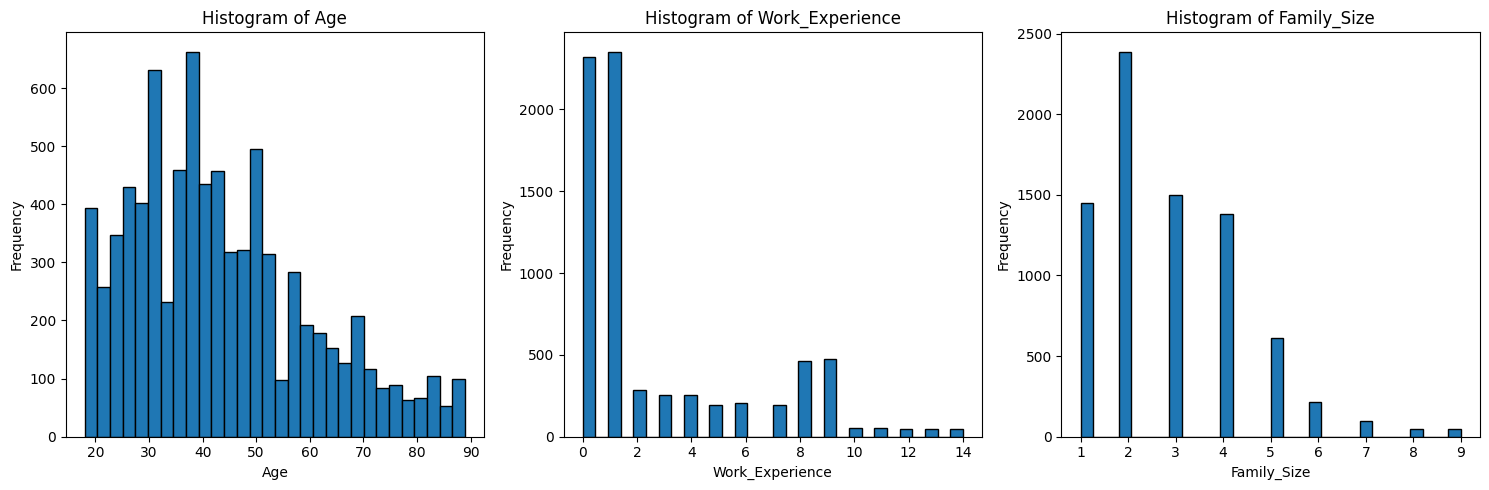

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming df is your DataFrame
numeric_columns = df.select_dtypes(include=['number']).columns  # Get numeric columns

# Determine the grid size
n_cols = 3  # Number of columns in the grid (you can adjust this)
n_rows = int(np.ceil(len(numeric_columns) / n_cols))  # Calculate rows needed for the grid

# Create the subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))  # Adjust figsize as needed
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Plot histogram for each numeric column
for i, col in enumerate(numeric_columns):
    axes[i].hist(df[col].dropna(), bins=30, edgecolor='black')  # Plot histogram
    axes[i].set_title(f'Histogram of {col}')  # Title for each subplot
    axes[i].set_xlabel(col)  # x-axis label
    axes[i].set_ylabel('Frequency')  # y-axis label

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')  # Hide empty subplots

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

From this, we can see that all continuous features are right-skewed distributed.

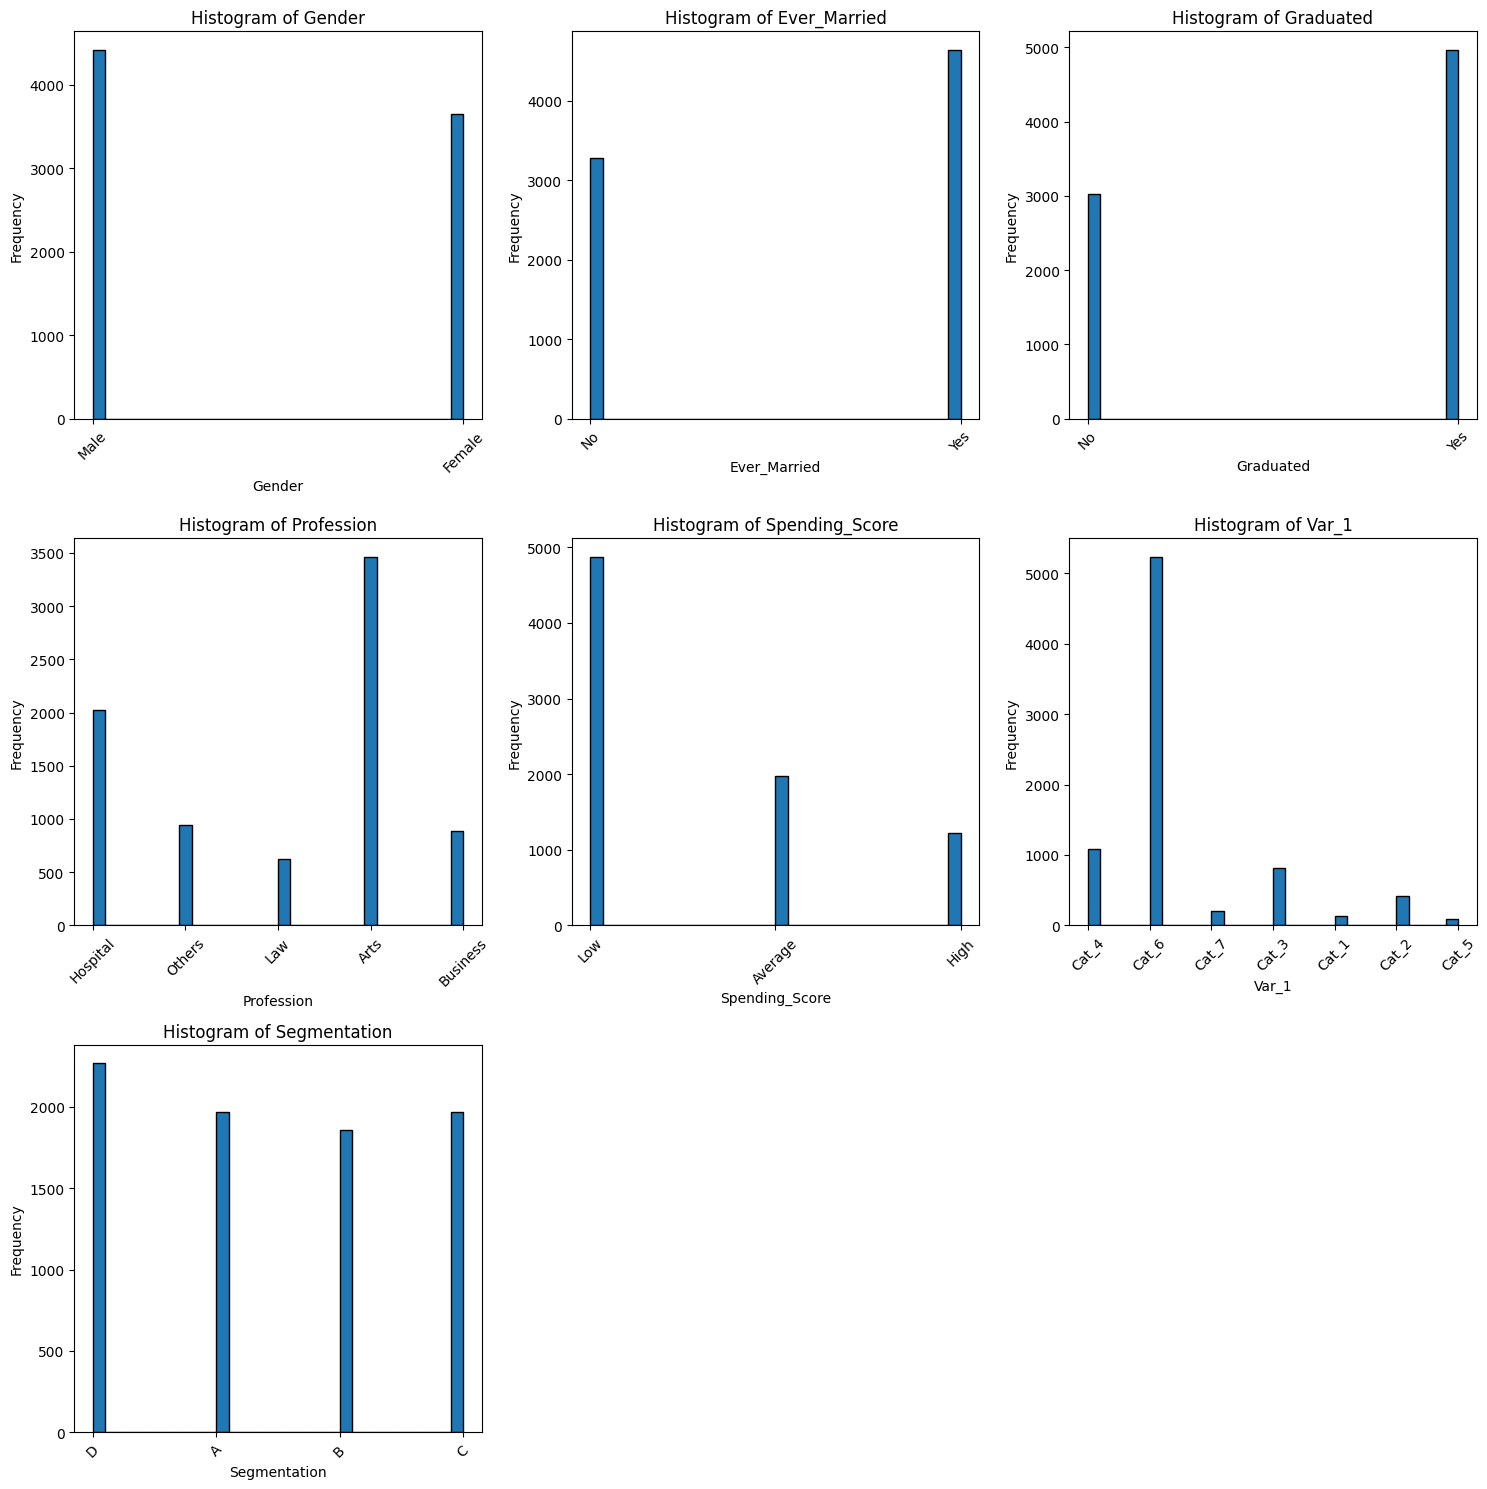

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming df is your DataFrame
categorical_columns = df.select_dtypes(include=['O']).columns  # Get numeric columns

# Determine the grid size
n_cols = 3  # Number of columns in the grid (you can adjust this)
n_rows = int(np.ceil(len(categorical_columns) / n_cols))  # Calculate rows needed for the grid

# Create the subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))  # Adjust figsize as needed
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Plot histogram for each numeric column
for i, col in enumerate(categorical_columns):
    axes[i].hist(df[col].dropna(), bins=30, edgecolor='black')  # Plot histogram
    axes[i].set_title(f'Histogram of {col}')  # Title for each subplot
    axes[i].set_xlabel(col)  # x-axis label
    axes[i].set_ylabel('Frequency')  # y-axis label

    # Tilt x-axis labels
    axes[i].tick_params(axis='x', rotation=45)  # Rotate the x-axis labels by 45 degrees

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')  # Hide empty subplots

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [ ]:
for col in categorical_columns:
  print(df[col].value_counts())
  print("-" * 30)

Gender
Male      4417
Female    3651
Name: count, dtype: int64
------------------------------
Ever_Married
Yes    4643
No     3285
Name: count, dtype: int64
------------------------------
Graduated
Yes    4968
No     3022
Name: count, dtype: int64
------------------------------
Profession
Arts        3465
Hospital    2020
Others       945
Business     891
Law          623
Name: count, dtype: int64
------------------------------
Spending_Score
Low        4878
Average    1974
High       1216
Name: count, dtype: int64
------------------------------
Var_1
Cat_6    5238
Cat_4    1089
Cat_3     822
Cat_2     422
Cat_7     203
Cat_1     133
Cat_5      85
Name: count, dtype: int64
------------------------------
Segmentation
D    2268
A    1972
C    1970
B    1858
Name: count, dtype: int64
------------------------------


## Violinplot comparing distribution of Continuous Variables against Segmentation

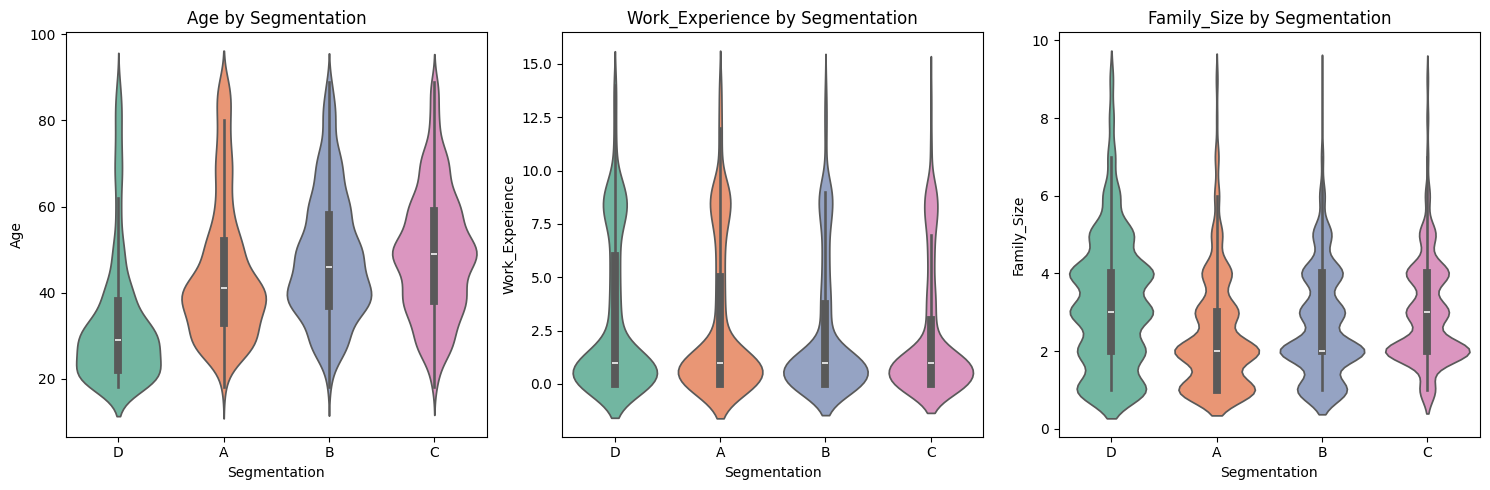

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Assuming df is your DataFrame
numeric_columns = df.select_dtypes(include=['number']).columns  # Get numeric columns
target_variable = 'Segmentation'  # Replace with the name of your target column

# Ensure the target variable exists and is discrete
if target_variable not in df.columns:
    raise ValueError(f"Target variable '{target_variable}' not found in the DataFrame.")
if not pd.api.types.is_categorical_dtype(df[target_variable]) and not pd.api.types.is_object_dtype(df[target_variable]):
    raise ValueError(f"Target variable '{target_variable}' is not discrete. Please check your data.")

# Determine the grid size
n_cols = 3  # Number of columns in the grid
n_rows = int(np.ceil(len(numeric_columns) / n_cols))  # Calculate rows needed for the grid

# Create the subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))  # Adjust figsize as needed
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Plot distribution of continuous variables against the target
for i, col in enumerate(numeric_columns):
    if col != target_variable:  # Skip the target variable if it's numeric
        sns.violinplot(
            x=target_variable,
            y=col,
            data=df,
            ax=axes[i],
            palette='Set2'
        )
        axes[i].set_title(f'{col} by {target_variable}')
        axes[i].set_xlabel(target_variable)
        axes[i].set_ylabel(col)

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')  # Hide empty subplots

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

We can see that <br>
1) For Age, group D, A, B, C have customers with low age median to high age median, respectively. <br>
2) For Work_Experience, the distribution of Work_Experience is the same across different groups. <br>
We can infer that just Work_Experience alone cannot be used to distinguish the group <br>
3) For Family_Size, a few assumptions can be drawn, which are <br>
3.1. Customers with Family Size 1 will not likely to be from group C <br>
3.2. Customers with Family Size 4 or more will be likely to be from group D

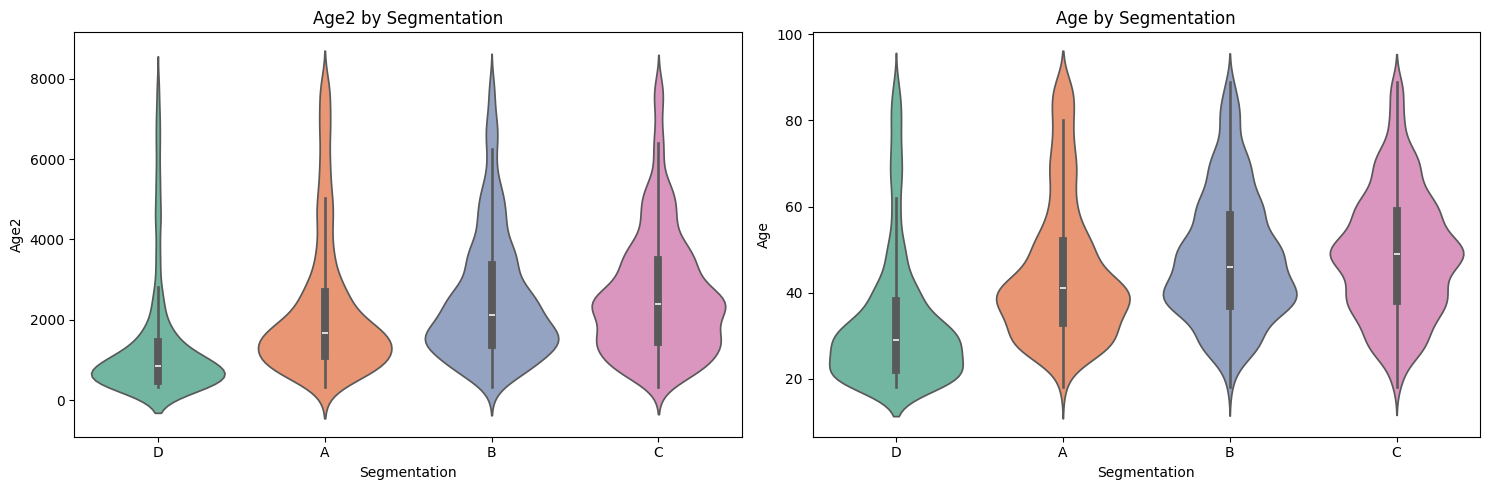

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df0 = df.loc[:, ['Age', 'Segmentation']]
df0['Age2'] = df0['Age'].apply(lambda x: x ** 2)

# Create the subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))  # Adjust figsize as needed

sns.violinplot(
            x='Segmentation',
            y='Age2',
            data=df0,
            ax=axes[0],
            palette='Set2'
        )
axes[0].set_title(f'Age2 by Segmentation')
axes[0].set_xlabel('Segmentation')
axes[0].set_ylabel('Age2')

sns.violinplot(
            x='Segmentation',
            y='Age',
            data=df0,
            ax=axes[1],
            palette='Set2'
        )
axes[1].set_title(f'Age by Segmentation')
axes[1].set_xlabel('Segmentation')
axes[1].set_ylabel('Age')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

We can see from the graph that Age^2 helps distinguish group A and B even better; however, it is still hard to separate group B, C, D using Age^2.

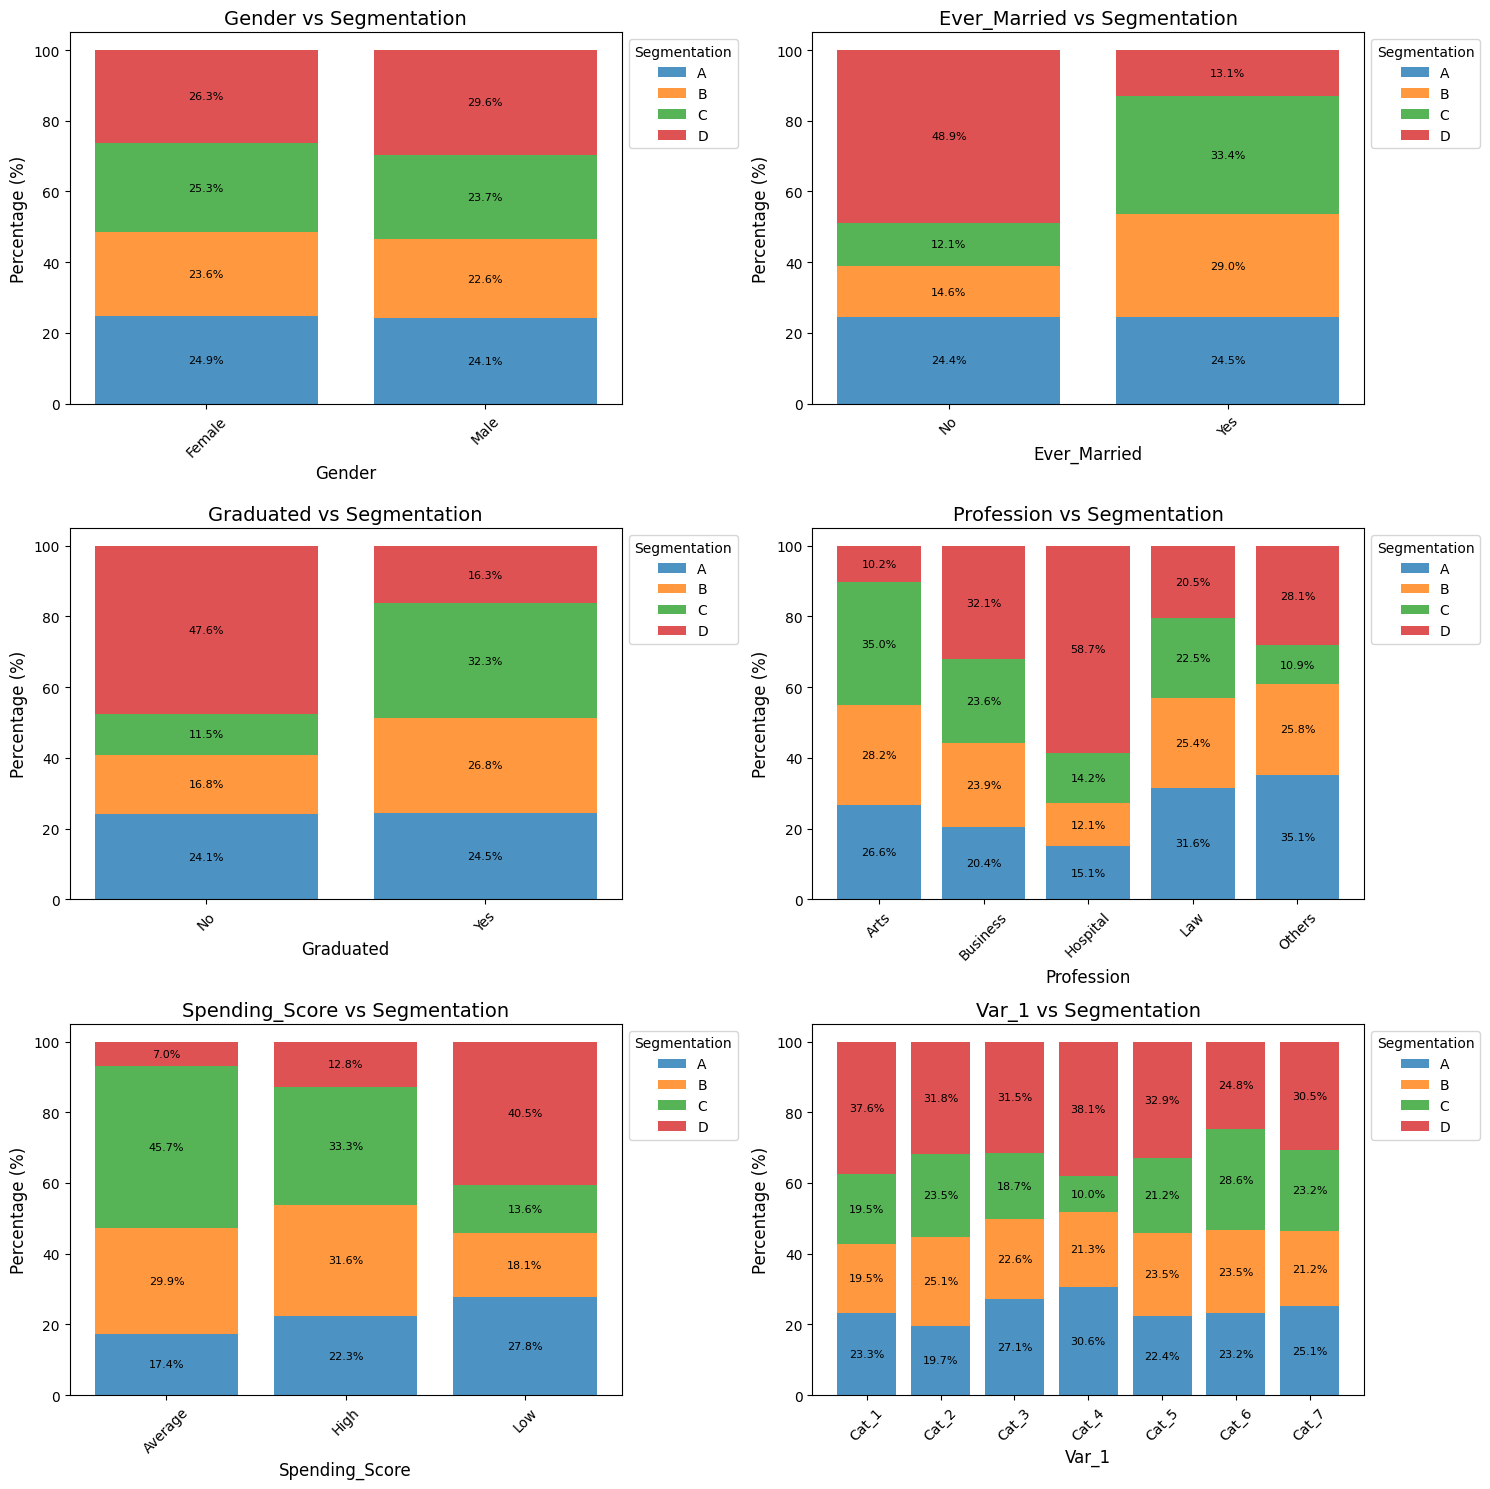

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming df is your DataFrame
independent_vars = df.select_dtypes(include=['O']).columns[:-1]  # Replace with your list of independent variables
target_var = 'Segmentation'  # Replace with your target variable

# Determine the grid size for subplots
n_cols = 2  # Number of columns in the grid
n_rows = int(np.ceil(len(independent_vars) / n_cols))  # Calculate rows based on the number of variables

# Create the subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Loop through each independent variable
for i, indep_var in enumerate(independent_vars):
    # Aggregate data with percentage calculation
    bar_data = df.groupby([indep_var, target_var]).size().reset_index(name='count')
    bar_data['percentage'] = bar_data.groupby(indep_var)['count'].transform(lambda x: (x / x.sum()) * 100)

    # Pivot data for stacked bar chart
    pivot_data = bar_data.pivot(index=indep_var, columns=target_var, values='percentage').fillna(0)

    # Plot 100% stacked bar chart
    bottom = np.zeros(len(pivot_data))  # Initialize bottom for stacking
    for category in pivot_data.columns:
        bars = axes[i].bar(
            pivot_data.index,
            pivot_data[category],
            bottom=bottom,
            label=str(category),
            alpha=0.8
        )
        # Annotate each layer
        for bar, value in zip(bars, pivot_data[category]):
            if value > 0:
                axes[i].text(
                    bar.get_x() + bar.get_width() / 2,
                    bar.get_height() / 2 + bar.get_y(),
                    f'{value:.1f}%',
                    ha='center', va='center', fontsize=8, color='black'
                )
        bottom += pivot_data[category]  # Update the bottom for stacking

    # Add titles and labels
    axes[i].set_title(f'{indep_var} vs {target_var}', fontsize=14)
    axes[i].set_xlabel(indep_var, fontsize=12)
    axes[i].set_ylabel('Percentage (%)', fontsize=12)

    # Tilt x-axis labels
    axes[i].tick_params(axis='x', rotation=45)

    # Add legend
    axes[i].legend(title=target_var, fontsize=10, loc='upper left', bbox_to_anchor=(1, 1))

# Remove unused subplots if any
for j in range(len(independent_vars), len(axes)):
    axes[j].axis('off')  # Hide extra subplots

plt.tight_layout()  # Adjust layout
plt.show()


From this, it can be said that <br>
1) Unmarried Customers are likely to be from group D <br>
2) Ungraduated Customers are likely to be from group D <br>
3) As for Profession: <br>
3.1 Customers with Healthcare and Marketing Profession are likely to be from group D <br>
3.2 Customers with Artist are likely to be from group C <br>
3.3 Customers with Executive are likely to be from group B <br>
3.4 Customers with Entertainment, Engineer, Lawyer are likely to be from group A <br>
4) As for Spending Score: <br>
4.1 Customers with Low Spending Score are likely to be from group D & A. <br>
4.2 Customers with Average and High Spending Score are likely to be from group B & C.


Gender and Var_1 does not have any significant difference across Segmentation.

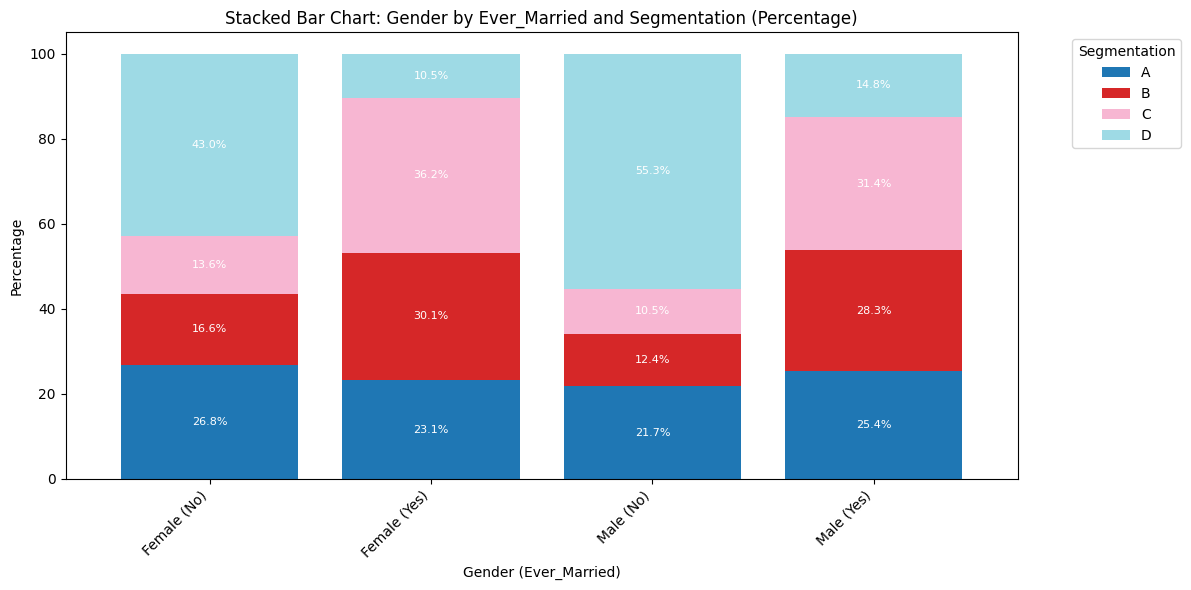

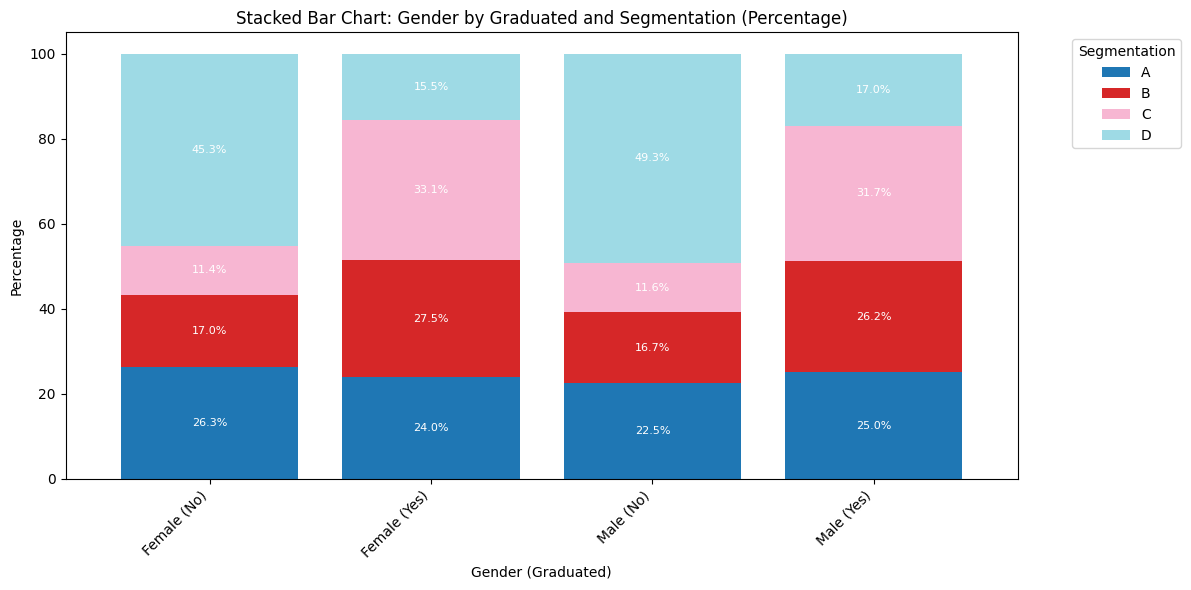

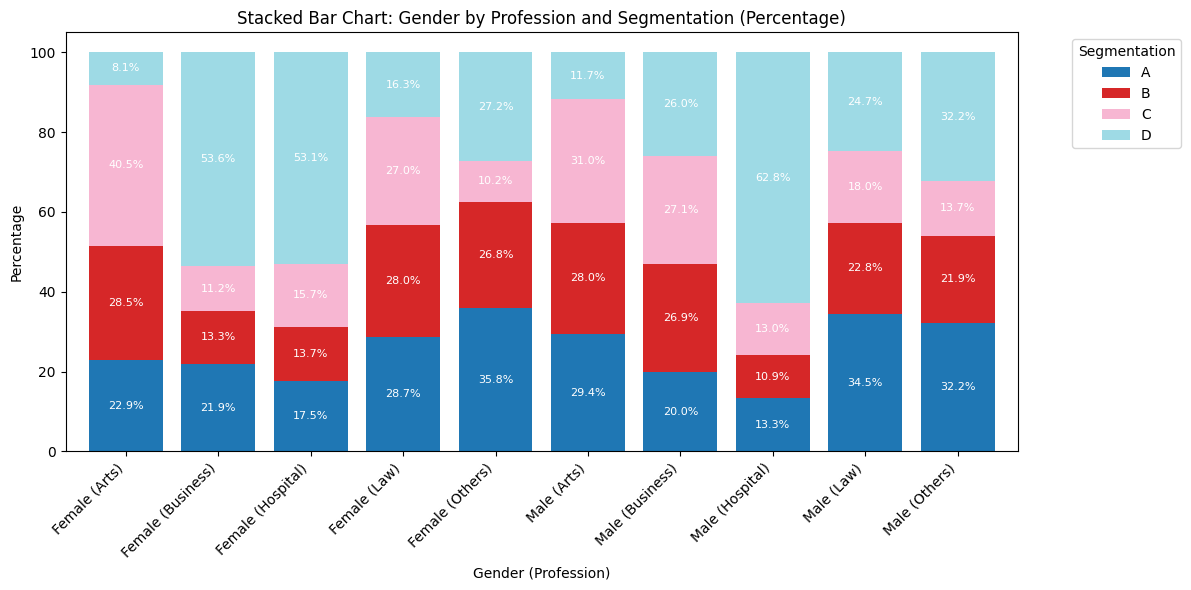

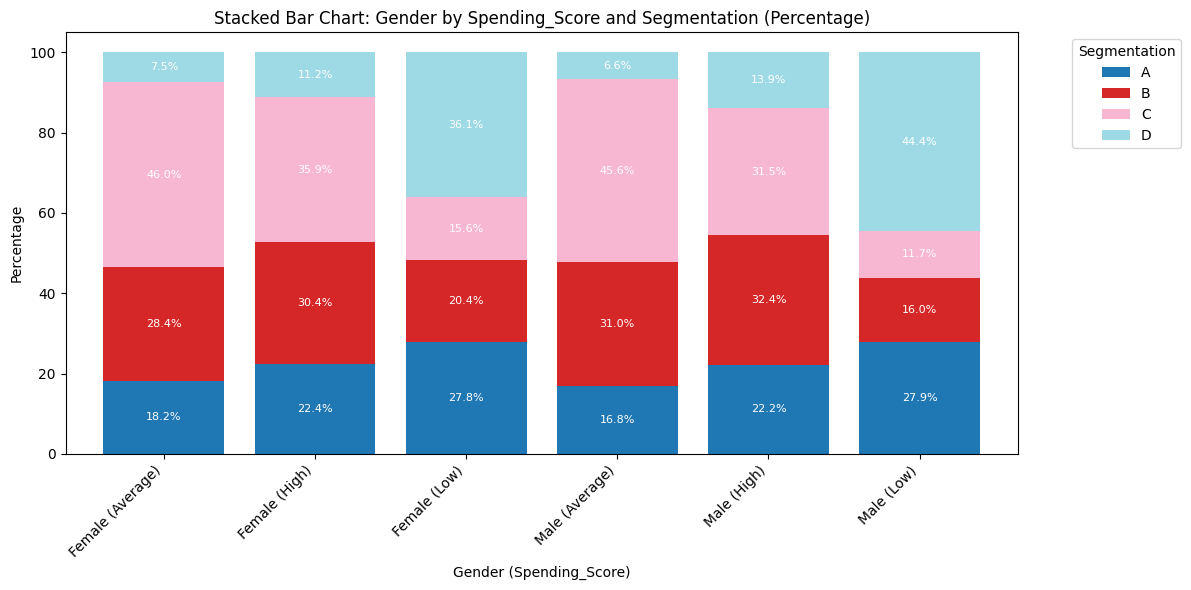

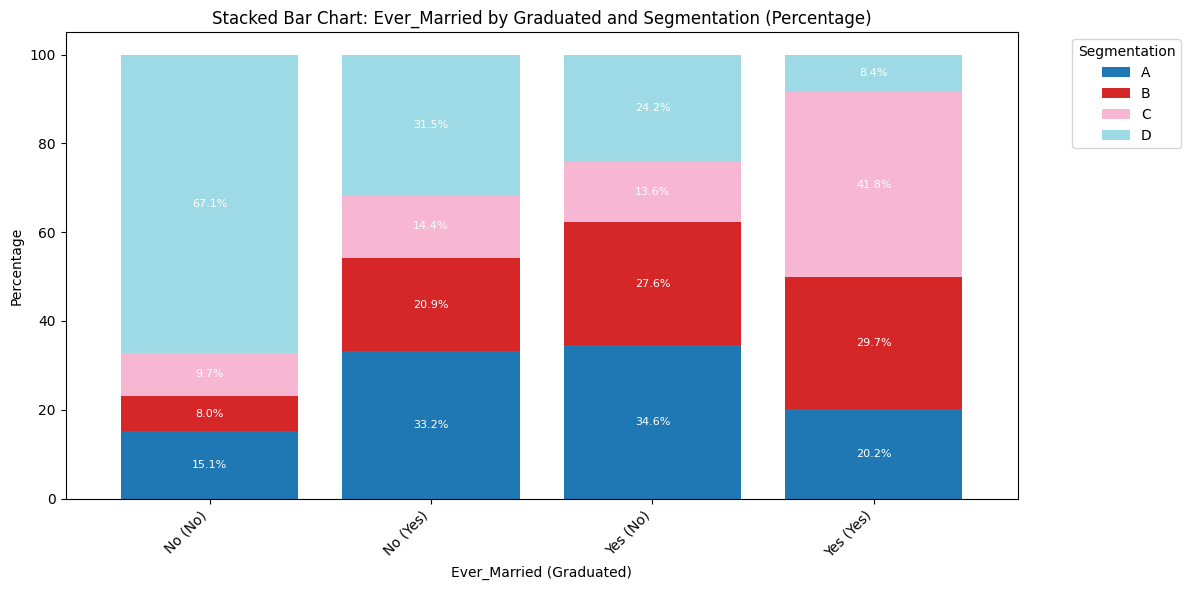

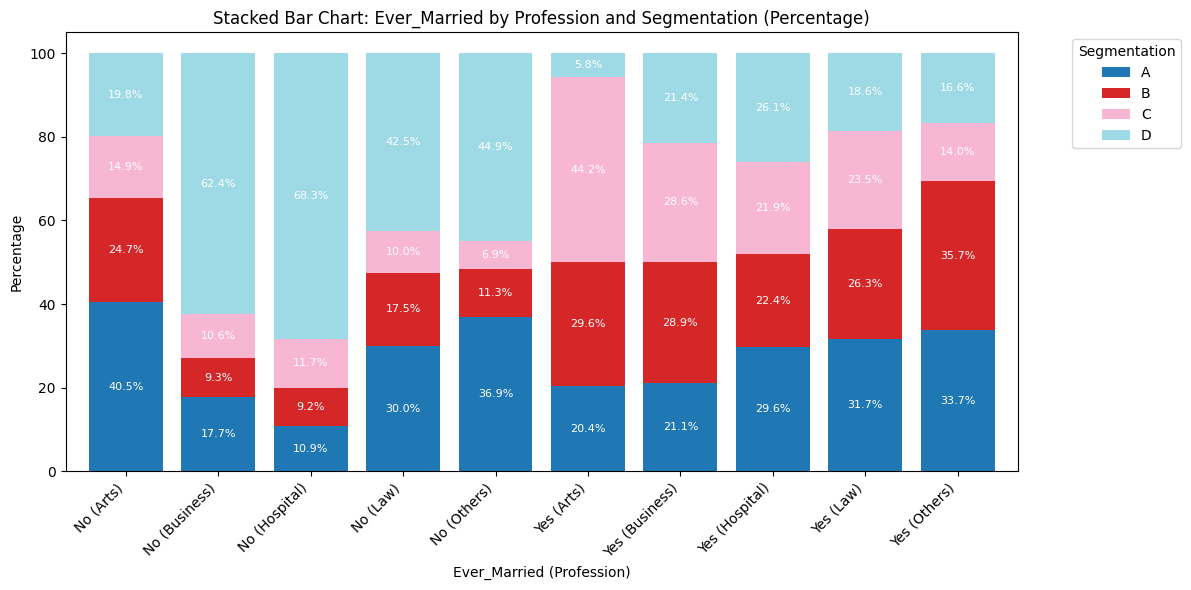

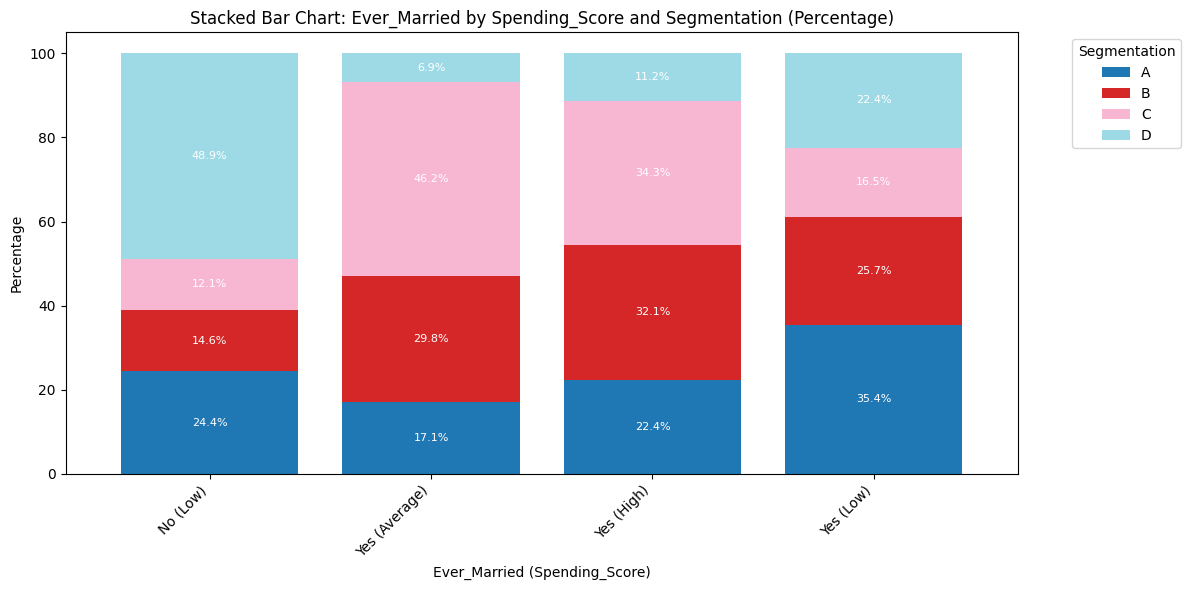

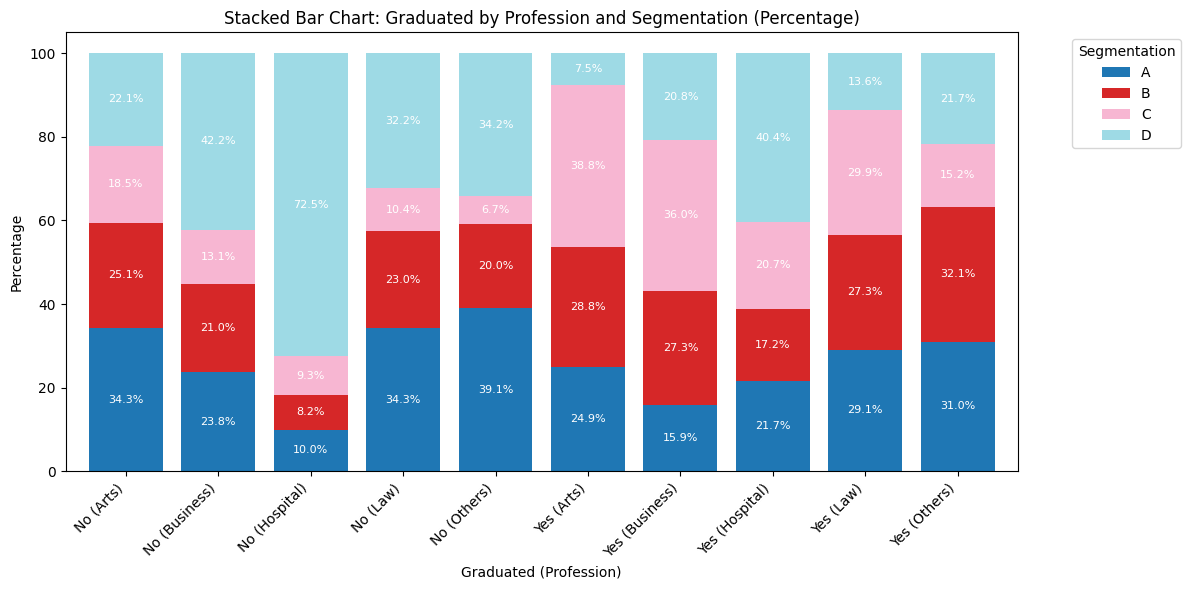

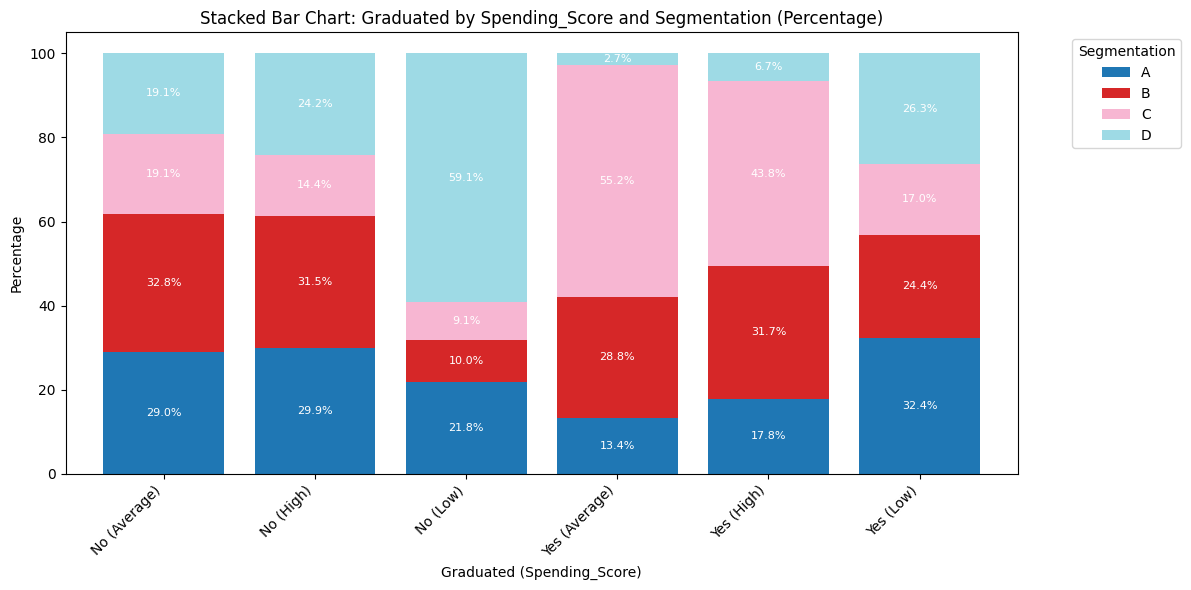

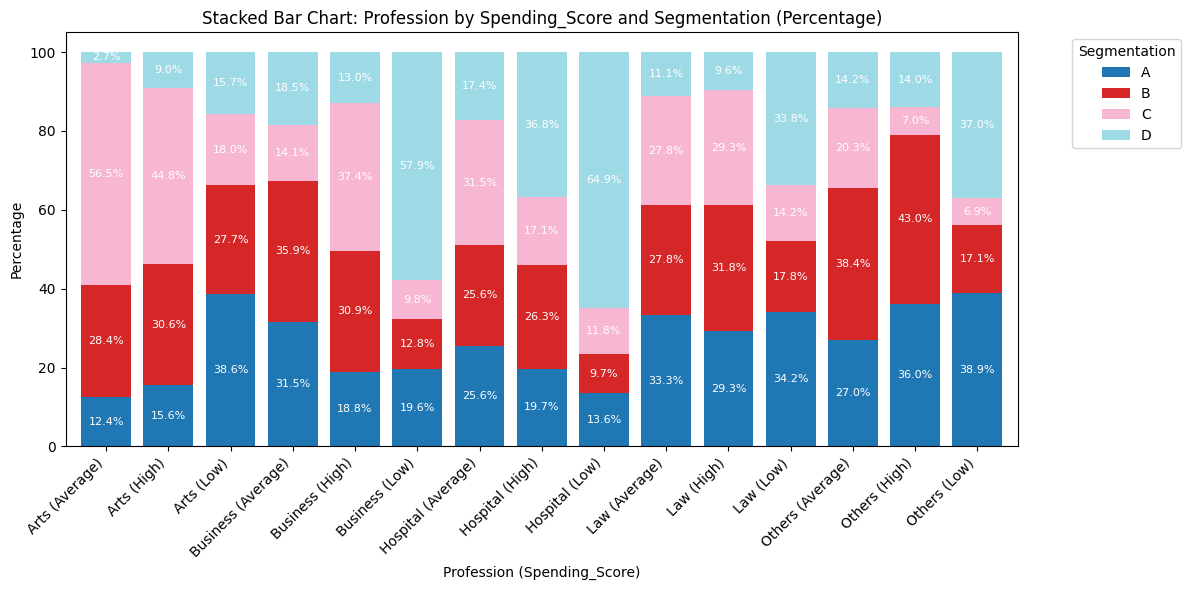

In [ ]:
import matplotlib.pyplot as plt
from itertools import combinations

def plot_stacked_bar_charts(df, target_variable='Segmentation'):
    # Identify categorical columns
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()[:-2]

    # Get all combinations of two categorical columns
    pairs = list(combinations(categorical_columns, 2))

    for pair in pairs:
        cat1, cat2 = pair  # Unpack the pair of categorical columns

        # Aggregating data
        grouped = df.groupby([cat1, cat2, target_variable]).size().reset_index(name='Count')

        # Pivoting data to structure for stacking
        pivot = grouped.pivot_table(index=[cat1, cat2], columns=target_variable, values='Count', fill_value=0)

        # Normalize each row to sum to 100%
        pivot_percentage = pivot.div(pivot.sum(axis=1), axis=0) * 100

        # Reset index to prepare for plotting
        pivot_percentage = pivot_percentage.reset_index()

        # Combine category labels for plotting
        pivot_percentage['Category_Combination'] = pivot_percentage[cat1] + " (" + pivot_percentage[cat2] + ")"

        # Plotting
        fig, ax = plt.subplots(figsize=(12, 6))
        segmentation_columns = pivot_percentage.columns[2:-1]  # Only Segmentation columns
        bars = pivot_percentage.set_index('Category_Combination')[segmentation_columns].plot(
            kind='bar', stacked=True, ax=ax, cmap='tab20', width=0.8
        )

        # Adding labels for each layer
        for container in ax.containers:
            for bar in container:
                if bar.get_height() > 0:  # Only label non-zero segments
                    height = bar.get_height()
                    ax.text(
                        bar.get_x() + bar.get_width() / 2,
                        bar.get_y() + height / 2,
                        f"{height:.1f}%",
                        ha='center', va='center', fontsize=8, color="white"
                    )

        # Customizing the plot
        plt.title(f"Stacked Bar Chart: {cat1} by {cat2} and {target_variable} (Percentage)")
        plt.xlabel(f"{cat1} ({cat2})")
        plt.ylabel("Percentage")
        plt.xticks(rotation=45, ha='right')

        # Place the legend outside the plot
        plt.legend(title=target_variable, bbox_to_anchor=(1.05, 1), loc='upper left')

        # Adjust layout to make space for the legend
        plt.tight_layout()

        # Show the plot
        plt.show()

# Example Usage
# Assuming `df` is your DataFrame and 'Segmentation' is the target variable
plot_stacked_bar_charts(df, target_variable='Segmentation')

Here, we will see the interaction of each segmentation. <br>
The list of pairs with interactions are:<br>
1) Gender and Profession<br>
2) Ever_Married and Graduated<br>
3) Ever_Married and Profession<br>
4) Ever_Married and Spending Score<br>
5) Graduated and Profession<br>
6) Graduated and Spending Score<br>
7) Profession and Spending Score

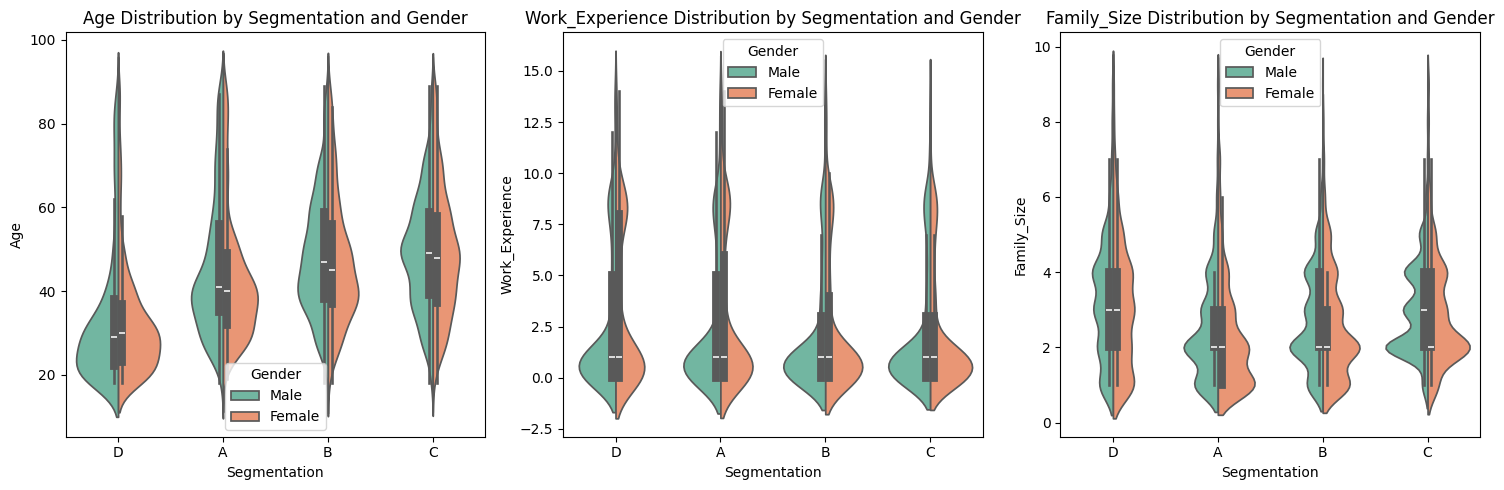

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Assuming df is your DataFrame
numeric_columns = df.select_dtypes(include=['number']).columns  # Get numeric columns
target_variable = 'Segmentation'  # Replace with the categorical variable for x-axis
hue_variable = 'Gender'  # Replace with the categorical variable for KDE split (e.g., Male vs. Female)

# Ensure variables exist
if target_variable not in df.columns:
    raise ValueError(f"Target variable '{target_variable}' not found in the DataFrame.")
if hue_variable not in df.columns:
    raise ValueError(f"Hue variable '{hue_variable}' not found in the DataFrame.")
if not pd.api.types.is_categorical_dtype(df[hue_variable]) and not pd.api.types.is_object_dtype(df[hue_variable]):
    raise ValueError(f"Hue variable '{hue_variable}' is not categorical. Please check your data.")

# Determine grid size
n_cols = 3
n_rows = int(np.ceil(len(numeric_columns) / n_cols))

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()  # Flatten for easy iteration

# Plot split violin plots
for i, col in enumerate(numeric_columns):
    if col != target_variable:
        sns.violinplot(
            x=target_variable,
            y=col,
            hue=hue_variable,  # Split KDE based on 'Gender'
            data=df,
            ax=axes[i],
            split=True,  # Split the violin plot into left/right KDEs
            palette='Set2'
        )
        axes[i].set_title(f'{col} Distribution by {target_variable} and {hue_variable}')
        axes[i].set_xlabel(target_variable)
        axes[i].set_ylabel(col)

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

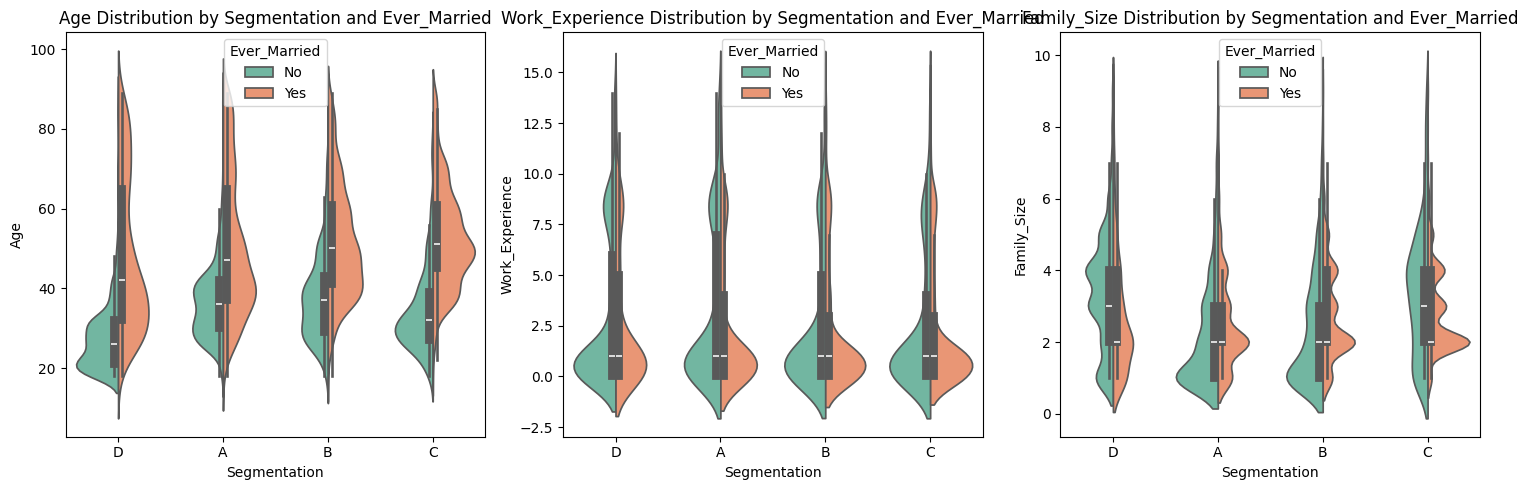

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Assuming df is your DataFrame
numeric_columns = df.select_dtypes(include=['number']).columns  # Get numeric columns
target_variable = 'Segmentation'  # Replace with the categorical variable for x-axis
hue_variable = 'Ever_Married'  # Replace with the categorical variable for KDE split (e.g., Male vs. Female)

# Ensure variables exist
if target_variable not in df.columns:
    raise ValueError(f"Target variable '{target_variable}' not found in the DataFrame.")
if hue_variable not in df.columns:
    raise ValueError(f"Hue variable '{hue_variable}' not found in the DataFrame.")
if not pd.api.types.is_categorical_dtype(df[hue_variable]) and not pd.api.types.is_object_dtype(df[hue_variable]):
    raise ValueError(f"Hue variable '{hue_variable}' is not categorical. Please check your data.")

# Determine grid size
n_cols = 3
n_rows = int(np.ceil(len(numeric_columns) / n_cols))

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()  # Flatten for easy iteration

# Plot split violin plots
for i, col in enumerate(numeric_columns):
    if col != target_variable:
        sns.violinplot(
            x=target_variable,
            y=col,
            hue=hue_variable,  # Split KDE based on 'Gender'
            data=df,
            ax=axes[i],
            split=True,  # Split the violin plot into left/right KDEs
            palette='Set2'
        )
        axes[i].set_title(f'{col} Distribution by {target_variable} and {hue_variable}')
        axes[i].set_xlabel(target_variable)
        axes[i].set_ylabel(col)

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

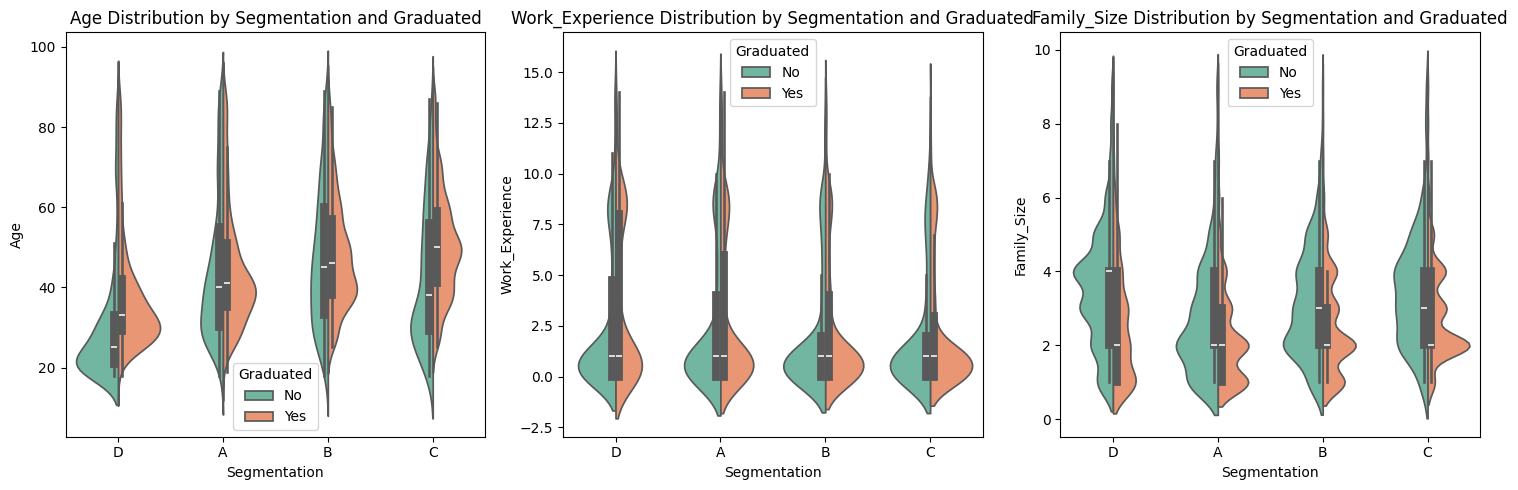

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Assuming df is your DataFrame
numeric_columns = df.select_dtypes(include=['number']).columns  # Get numeric columns
target_variable = 'Segmentation'  # Replace with the categorical variable for x-axis
hue_variable = 'Graduated'  # Replace with the categorical variable for KDE split (e.g., Male vs. Female)

# Ensure variables exist
if target_variable not in df.columns:
    raise ValueError(f"Target variable '{target_variable}' not found in the DataFrame.")
if hue_variable not in df.columns:
    raise ValueError(f"Hue variable '{hue_variable}' not found in the DataFrame.")
if not pd.api.types.is_categorical_dtype(df[hue_variable]) and not pd.api.types.is_object_dtype(df[hue_variable]):
    raise ValueError(f"Hue variable '{hue_variable}' is not categorical. Please check your data.")

# Determine grid size
n_cols = 3
n_rows = int(np.ceil(len(numeric_columns) / n_cols))

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()  # Flatten for easy iteration

# Plot split violin plots
for i, col in enumerate(numeric_columns):
    if col != target_variable:
        sns.violinplot(
            x=target_variable,
            y=col,
            hue=hue_variable,  # Split KDE based on 'Gender'
            data=df,
            ax=axes[i],
            split=True,  # Split the violin plot into left/right KDEs
            palette='Set2'
        )
        axes[i].set_title(f'{col} Distribution by {target_variable} and {hue_variable}')
        axes[i].set_xlabel(target_variable)
        axes[i].set_ylabel(col)

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

# Feature Engineering

In [ ]:
from typing import Optional
import pandas as pd
import numpy as np

# impute using mean and median
def data_processing_v1(data1: pd.DataFrame, data2: Optional[pd.DataFrame] = None, create_int = False):
  df1 = data1.copy()

  columns_to_drop = ["ID", "Var_1", 'Gender', 'Work_Experience']
  df1 = df1.drop(columns_to_drop, axis=1, errors="ignore")

  num_cols = df1.select_dtypes(include=np.number).columns
  cat_cols = df1.select_dtypes(include="object").columns
  imputer_list = []
  col_order_list = []

  for col in df1.columns:
    # column list order marking
    col_order_list.append(col)
    # impute median for numeric
    if col in num_cols:
      median = df1[col].median()
      imputer_list.append(median)
      df1[col] = df1[col].fillna(value=median)
    # impute mode for category
    elif col in cat_cols:
      mode = df1[col].mode()
      mode_value = mode[0]
      imputer_list.append(mode_value)
      df1[col] = df1[col].fillna(value=mode_value)

  # Exclude the last column
  df1_dummy = pd.get_dummies(df1.iloc[:, :-1], drop_first=True).map(lambda x: float(x))

  # Add back the "Segmentation" column
  df1_dummy["Segmentation"] = df1["Segmentation"]

  mu_age_df1 = df1_dummy['Age'].mean()
  sd_age_df1 = df1_dummy['Age'].std()
  df1_dummy['Age'] = df1_dummy['Age'].apply(lambda age: (age-mu_age_df1)/sd_age_df1)

  if data2 is not None:
    df2 = data2.copy()
    df2 = df2.drop(columns_to_drop, axis=1, errors="ignore")

    for idx, col in enumerate(df2.columns):
      # check if column in same order
      if col != col_order_list[idx]:
        raise Exception("Column NOT in the same order.")
      # impute value according to order
      df2[col] = df2[col].fillna(value=imputer_list[idx])

    # Exclude the last column
    df2_dummy = pd.get_dummies(df2.iloc[:, :-1], drop_first=True).map(lambda x: float(x))

    # Add back the "Segmentation" column
    df2_dummy["Segmentation"] = df2["Segmentation"]

    df2_dummy['Age'] = df2_dummy['Age'].apply(lambda age: (age-mu_age_df1)/sd_age_df1)

    return df1_dummy, df2_dummy

  return df1_dummy, None

In [ ]:
df1, __ = data_processing_v1(df)

In [ ]:
df1

,Age,Family_Size,Ever_Married_Yes,Graduated_Yes,Profession_Business,Profession_Hospital,Profession_Law,Profession_Others,Spending_Score_High,Spending_Score_Low,Segmentation
0,-1.284544,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,D
1,-0.327131,3.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,A
2,1.408181,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,B
3,1.408181,2.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,B
4,-0.207454,6.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,-1.284544,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,D
8064,-0.506646,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,D
8065,-0.626322,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,D
8066,-0.985352,4.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,B


In [ ]:
df1.columns

Index(['Age', 'Work_Experience', 'Family_Size', 'Gender_Male',
       'Ever_Married_Yes', 'Graduated_Yes', 'Profession_Business',
       'Profession_Hospital', 'Profession_Law', 'Profession_Others',
       'Spending_Score_High', 'Spending_Score_Low', 'Var_1_Cat_2',
       'Var_1_Cat_3', 'Var_1_Cat_4', 'Var_1_Cat_5', 'Var_1_Cat_6',
       'Var_1_Cat_7', 'Segmentation'],
      dtype='object')

# Train and Test (v1: Bare Variables)

In [ ]:
import pandas as pd

# Define the file path
# file_path = '/content/drive/My Drive/SIP/Train.csv'
file_path_train = '/content/Train.csv'
file_path_test = '/content/Test.csv'

# Read the CSV file into a pandas DataFrame
train = pd.read_csv(file_path_train)
test = pd.read_csv(file_path_test)

In [ ]:
train1, test1 = data_processing_v1(train, test)

In [ ]:
train1.columns == test1.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [ ]:
train1.columns

Index(['Age', 'Family_Size', 'Ever_Married_Yes', 'Graduated_Yes',
       'Profession_Doctor', 'Profession_Engineer', 'Profession_Entertainment',
       'Profession_Executive', 'Profession_Healthcare', 'Profession_Homemaker',
       'Profession_Lawyer', 'Profession_Marketing', 'Spending_Score_High',
       'Spending_Score_Low', 'Segmentation'],
      dtype='object')

In [ ]:
train1

,Age,Family_Size,Ever_Married_Yes,Graduated_Yes,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Spending_Score_High,Spending_Score_Low,Segmentation
0,-1.284544,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,D
1,-0.327131,3.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A
2,1.408181,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,B
3,1.408181,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,B
4,-0.207454,6.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8063,-1.284544,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,D
8064,-0.506646,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,D
8065,-0.626322,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,D
8066,-0.985352,4.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,B


In [ ]:
train1.sum(axis=0)

,0
Age,0.0
Family_Size,23045.0
Ever_Married_Yes,4783.0
Graduated_Yes,5046.0
Profession_Doctor,688.0
Profession_Engineer,699.0
Profession_Entertainment,949.0
Profession_Executive,599.0
Profession_Healthcare,1332.0
Profession_Homemaker,246.0


In [ ]:
X_train1 = train1.iloc[:, :-1]
y_train1 = train1.iloc[:, -1]
X_test1 = test1.iloc[:, :-1]
y_test1 = test1.iloc[:, -1]

In [ ]:
!pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 3.3 MB/s eta 0:00:00


In [ ]:
np.random.seed(42)

In [ ]:
from skopt import BayesSearchCV
from skopt.space import Real, Integer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score

# Define the base model
model = OneVsRestClassifier(LogisticRegression(tol=0.001, max_iter=200, penalty='elasticnet', solver='saga'))

# Define the hyperparameter distribution (for LogisticRegression inside OneVsRestClassifier)
distributions = {"estimator__C": Real(0.001, 0.01, 'uniform'),
                 "estimator__l1_ratio": Real(0, 1, 'uniform')}

# Perform Randomized Search
clf = BayesSearchCV(model, distributions, cv=4, n_iter=20, verbose=10, scoring='roc_auc_ovr')
search = clf.fit(X_train1, y_train1)

# Print the best parameters and score
print(search.best_params_)
print(search.best_score_)

print("train accuracy score: %s" % clf.score(X_train1, y_train1))
roc_auc = roc_auc_score(y_train1, clf.predict_proba(X_train1), multi_class="ovr")
print("train roc_auc score: %s" % roc_auc)

y_pred_logistic = clf.predict(X_test1)
y_predprob_logistic = clf.predict_proba(X_test1)

print("test accuracy score: %s" % clf.score(X_test1, y_test1))
roc_auc = roc_auc_score(y_test1, y_predprob_logistic, multi_class="ovr")
print("test roc_auc score: %s" % roc_auc)

Fitting 4 folds for each of 1 candidates, totalling 4 fits
[CV 1/4; 1/1] START estimator__C=0.00853175075487701, estimator__l1_ratio=0.025219004177756472
[CV 1/4; 1/1] END estimator__C=0.00853175075487701, estimator__l1_ratio=0.025219004177756472;, score=0.738 total time=   0.2s
[CV 2/4; 1/1] START estimator__C=0.00853175075487701, estimator__l1_ratio=0.025219004177756472
[CV 2/4; 1/1] END estimator__C=0.00853175075487701, estimator__l1_ratio=0.025219004177756472;, score=0.730 total time=   0.2s
[CV 3/4; 1/1] START estimator__C=0.00853175075487701, estimator__l1_ratio=0.025219004177756472
[CV 3/4; 1/1] END estimator__C=0.00853175075487701, estimator__l1_ratio=0.025219004177756472;, score=0.736 total time=   0.2s
[CV 4/4; 1/1] START estimator__C=0.00853175075487701, estimator__l1_ratio=0.025219004177756472
[CV 4/4; 1/1] END estimator__C=0.00853175075487701, estimator__l1_ratio=0.025219004177756472;, score=0.733 total time=   0.2s
Fitting 4 folds for each of 1 candidates, totalling 4 fit

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from skopt import BayesSearchCV
from skopt.space import Real, Integer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.multiclass import OneVsRestClassifier
from lightgbm import LGBMClassifier

params = {
    'objective': 'multiclass',  # for multiclass classification
    'metric': 'multi_logloss',
    'boosting_type': 'gbdt',  # Gradient Boosting Decision Tree
    'verbosity': -1,
    'colsample_bytree': 0.6,
    'min_data_in_leaf': 100
}

# Define the base model
model = LGBMClassifier(**params)

# Define the hyperparameter distribution (for LogisticRegression inside OneVsRestClassifier)
distributions = {
    'max_depth': Integer(3, 6),  # Maximum depth of each tree
    'learning_rate': Real(1e-3, 1e-2, prior='uniform'),  # Learning rate
    'n_estimators': Integer(100, 200),  # Number of boosting iterations
    'lambda_l1': Real(10, 15, prior='uniform'),  # L1 regularization
    'lambda_l2': Real(10, 15, prior='uniform'),  # L2 regularization
    'subsample': Real(0.4, 0.7, prior='uniform'),  # Fraction of data used for each boosting round
}

# Perform Randomized Search
clf = BayesSearchCV(model, distributions, cv=4, n_iter=30, verbose=5)
search = clf.fit(X_train1, y_train1)

# Print the best parameters and score
print(search.best_params_)
print(search.best_score_)

print("train accuracy score: %s" % clf.score(X_train1, y_train1))
roc_auc = roc_auc_score(y_train1, clf.predict_proba(X_train1), multi_class="ovr")
print("train roc_auc score: %s" % roc_auc)

y_predprob_lgbm = clf.predict_proba(X_test1)

print("test accuracy score: %s" % clf.score(X_test1, y_test1))
roc_auc = roc_auc_score(y_test1, y_predprob_lgbm, multi_class="ovr")
print("test roc_auc score: %s" % roc_auc)

Fitting 4 folds for each of 1 candidates, totalling 4 fits
[CV 1/4] END lambda_l1=12.78869823264197, lambda_l2=12.4449080435844, learning_rate=0.005395419444666805, max_depth=3, n_estimators=188, subsample=0.6692018621050241;, score=0.504 total time=   1.2s
[CV 2/4] END lambda_l1=12.78869823264197, lambda_l2=12.4449080435844, learning_rate=0.005395419444666805, max_depth=3, n_estimators=188, subsample=0.6692018621050241;, score=0.487 total time=   1.9s
[CV 3/4] END lambda_l1=12.78869823264197, lambda_l2=12.4449080435844, learning_rate=0.005395419444666805, max_depth=3, n_estimators=188, subsample=0.6692018621050241;, score=0.492 total time=   1.2s
[CV 4/4] END lambda_l1=12.78869823264197, lambda_l2=12.4449080435844, learning_rate=0.005395419444666805, max_depth=3, n_estimators=188, subsample=0.6692018621050241;, score=0.497 total time=   1.2s
Fitting 4 folds for each of 1 candidates, totalling 4 fits
[CV 1/4] END lambda_l1=10.99820869850954, lambda_l2=10.408486925255898, learning_rate=

In [ ]:
from lightgbm import LGBMClassifier

# Example usage
np.random.seed(42)

params = {
    'objective': 'multiclass',  # for binary classification
    'metric': 'multi_error',  # for accuracy
    'boosting_type': 'gbdt',  # Gradient Boosting Decision Tree
    'learning_rate': 0.05,  # learning rate
}

# Model
model = LGBMClassifier(**params)

model.fit(X_train1, y_train1)
print(model.score(X_train1, y_train1))
print(model.score(X_test1, y_test1))

roc_auc = roc_auc_score(y_train1, model.predict_proba(X_train1), multi_class="ovr")
print("train roc_auc score: %s" % roc_auc)
roc_auc = roc_auc_score(y_test1, model.predict_proba(X_test1), multi_class="ovr")
print("test roc_auc score: %s" % roc_auc)

0.5881259295984135
0.3395508184240579
train roc_auc score: 0.8343373922094793
test roc_auc score: 0.5828616920590837


In [ ]:
from skopt import BayesSearchCV
from skopt.space import Real, Integer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.multiclass import OneVsRestClassifier
from lightgbm import LGBMClassifier

params = {
    'objective': 'multiclass',  # for multiclass classification
    'metric': 'multi_logloss',
    'boosting_type': 'gbdt',  # Gradient Boosting Decision Tree
    'verbosity': -1,
    'colsample_bytree': 0.6,
    'min_data_in_leaf': 100,
    'n_estimators': 200,
    'learning_rate': 0.01,
    'max_depth': 6,
    'subsample': 0.65,
}

# Define the base model
model = LGBMClassifier(**params)

# Define the hyperparameter distribution (for LogisticRegression inside OneVsRestClassifier)
distributions = {
    'lambda_l1': Real(10, 20, prior='uniform'),  # L1 regularization
    'lambda_l2': Real(10, 20, prior='uniform'),  # L2 regularization
}

# Perform Randomized Search
clf = BayesSearchCV(model, distributions, cv=4, n_iter=20, verbose=5)
search = clf.fit(X_train1, y_train1)

# Print the best parameters and score
print(search.best_params_)
print(search.best_score_)

print("train accuracy score: %s" % clf.score(X_train1, y_train1))
roc_auc = roc_auc_score(y_train1, clf.predict_proba(X_train1), multi_class="ovr")
print("train roc_auc score: %s" % roc_auc)

y_predprob_lgbm = clf.predict_proba(X_test1)

print("test accuracy score: %s" % clf.score(X_test1, y_test1))
roc_auc = roc_auc_score(y_test1, y_predprob_lgbm, multi_class="ovr")
print("test roc_auc score: %s" % roc_auc)

Fitting 4 folds for each of 1 candidates, totalling 4 fits
[CV 1/4] END lambda_l1=15.311899865889789, lambda_l2=17.658491611244575;, score=0.521 total time=   0.7s
[CV 2/4] END lambda_l1=15.311899865889789, lambda_l2=17.658491611244575;, score=0.494 total time=   1.2s
[CV 3/4] END lambda_l1=15.311899865889789, lambda_l2=17.658491611244575;, score=0.505 total time=   2.5s
[CV 4/4] END lambda_l1=15.311899865889789, lambda_l2=17.658491611244575;, score=0.500 total time=   2.4s
Fitting 4 folds for each of 1 candidates, totalling 4 fits
[CV 1/4] END lambda_l1=10.385767232995951, lambda_l2=14.683711002044198;, score=0.522 total time=   0.8s
[CV 2/4] END lambda_l1=10.385767232995951, lambda_l2=14.683711002044198;, score=0.496 total time=   0.8s
[CV 3/4] END lambda_l1=10.385767232995951, lambda_l2=14.683711002044198;, score=0.512 total time=   0.8s
[CV 4/4] END lambda_l1=10.385767232995951, lambda_l2=14.683711002044198;, score=0.503 total time=   0.8s
Fitting 4 folds for each of 1 candidates, 

In [ ]:
from skopt import BayesSearchCV
from skopt.space import Real, Integer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.multiclass import OneVsRestClassifier
from lightgbm import LGBMClassifier

params = {
    'objective': 'multiclass',  # for multiclass classification
    'metric': 'multi_logloss',
    'boosting_type': 'gbdt',  # Gradient Boosting Decision Tree
    'verbosity': -1,
    'n_estimators': 200,
    'learning_rate': 0.01,
    'min_data_in_leaf': 100,
    'max_depth': 6,
    'lambda_l1': 10,
    'lambda_l2': 10
}

# Define the base model
model = LGBMClassifier(**params)

# Define the hyperparameter distribution (for LogisticRegression inside OneVsRestClassifier)
distributions = {
    'feature_fraction': Real(0.3, 0.5, prior='uniform'), #(Use all features)
    'bagging_fraction': Real(0.7, 0.9, prior='uniform'), #(No row subsampling)
    'bagging_freq': Integer(1, 5, prior='uniform') #(No bagging)
}

# Perform Randomized Search
clf = BayesSearchCV(model, distributions, cv=4, n_iter=20, verbose=5)
search = clf.fit(X_train1, y_train1)

# Print the best parameters and score
print(search.best_params_)
print(search.best_score_)

print("train accuracy score: %s" % clf.score(X_train1, y_train1))
roc_auc = roc_auc_score(y_train1, clf.predict_proba(X_train1), multi_class="ovr")
print("train roc_auc score: %s" % roc_auc)

y_predprob_lgbm = clf.predict_proba(X_test1)

print("test accuracy score: %s" % clf.score(X_test1, y_test1))
roc_auc = roc_auc_score(y_test1, y_predprob_lgbm, multi_class="ovr")
print("test roc_auc score: %s" % roc_auc)

Fitting 4 folds for each of 1 candidates, totalling 4 fits
[CV 1/4] END bagging_fraction=0.8832308956061955, bagging_freq=4, feature_fraction=0.3088099043178863;, score=0.508 total time=   0.8s
[CV 2/4] END bagging_fraction=0.8832308956061955, bagging_freq=4, feature_fraction=0.3088099043178863;, score=0.476 total time=   0.8s
[CV 3/4] END bagging_fraction=0.8832308956061955, bagging_freq=4, feature_fraction=0.3088099043178863;, score=0.497 total time=   0.8s
[CV 4/4] END bagging_fraction=0.8832308956061955, bagging_freq=4, feature_fraction=0.3088099043178863;, score=0.500 total time=   0.8s
Fitting 4 folds for each of 1 candidates, totalling 4 fits
[CV 1/4] END bagging_fraction=0.7450299040282234, bagging_freq=4, feature_fraction=0.4081611827393309;, score=0.514 total time=   0.9s
[CV 2/4] END bagging_fraction=0.7450299040282234, bagging_freq=4, feature_fraction=0.4081611827393309;, score=0.490 total time=   0.9s
[CV 3/4] END bagging_fraction=0.7450299040282234, bagging_freq=4, featur

In [ ]:
from skopt import BayesSearchCV
from skopt.space import Real, Integer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.multiclass import OneVsRestClassifier
from lightgbm import LGBMClassifier

params = {
    'objective': 'multiclass',  # for multiclass classification
    'metric': 'multi_logloss',
    'boosting_type': 'gbdt',  # Gradient Boosting Decision Tree
    'verbosity': -1,
    'n_estimators': 50,
    'learning_rate': 0.01,
    'min_data_in_leaf': 100,
    'max_depth': 4,
    'lambda_l1': 10,
    'lambda_l2': 10
}

# Define the base model
model = LGBMClassifier(**params)

# Define the hyperparameter distribution (for LogisticRegression inside OneVsRestClassifier)
distributions = {
    'feature_fraction': Real(0.3, 0.5, prior='uniform'), #(Use all features)
    'bagging_fraction': Real(0.3, 0.6, prior='uniform'), #(No row subsampling)
    'bagging_freq': Integer(10, 20, prior='uniform') #(No bagging)
}

# Perform Randomized Search
clf = BayesSearchCV(model, distributions, cv=4, n_iter=20, verbose=5)
search = clf.fit(X_train1, y_train1)

# Print the best parameters and score
print(search.best_params_)
print(search.best_score_)

print("train accuracy score: %s" % clf.score(X_train1, y_train1))
roc_auc = roc_auc_score(y_train1, clf.predict_proba(X_train1), multi_class="ovr")
print("train roc_auc score: %s" % roc_auc)

y_predprob_lgbm = clf.predict_proba(X_test1)

print("test accuracy score: %s" % clf.score(X_test1, y_test1))
roc_auc = roc_auc_score(y_test1, y_predprob_lgbm, multi_class="ovr")
print("test roc_auc score: %s" % roc_auc)

Fitting 4 folds for each of 1 candidates, totalling 4 fits
[CV 1/4] END bagging_fraction=0.3313993642658204, bagging_freq=13, feature_fraction=0.41265965361866563;, score=0.473 total time=   0.2s
[CV 2/4] END bagging_fraction=0.3313993642658204, bagging_freq=13, feature_fraction=0.41265965361866563;, score=0.468 total time=   0.2s
[CV 3/4] END bagging_fraction=0.3313993642658204, bagging_freq=13, feature_fraction=0.41265965361866563;, score=0.472 total time=   0.2s
[CV 4/4] END bagging_fraction=0.3313993642658204, bagging_freq=13, feature_fraction=0.41265965361866563;, score=0.476 total time=   0.2s
Fitting 4 folds for each of 1 candidates, totalling 4 fits
[CV 1/4] END bagging_fraction=0.3933414698109308, bagging_freq=19, feature_fraction=0.4574438978911448;, score=0.472 total time=   0.3s
[CV 2/4] END bagging_fraction=0.3933414698109308, bagging_freq=19, feature_fraction=0.4574438978911448;, score=0.471 total time=   0.4s
[CV 3/4] END bagging_fraction=0.3933414698109308, bagging_freq

In [ ]:
from skopt import BayesSearchCV
from skopt.space import Real, Integer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.multiclass import OneVsRestClassifier
from lightgbm import LGBMClassifier

params = {
    'objective': 'multiclass',  # for multiclass classification
    'metric': 'multi_logloss',
    'boosting_type': 'gbdt',  # Gradient Boosting Decision Tree
    'verbosity': -1,
    'n_estimators': 100,
    'learning_rate': 0.01,
    'min_data_in_leaf': 1000,
    'max_depth': 4,
    'feature_fraction': 0.5,
    'bagging_fraction': 0.5,
    'bagging_freq': 2
}

# Define the base model
model = LGBMClassifier(**params)

# Define the hyperparameter distribution (for LogisticRegression inside OneVsRestClassifier)
distributions = {
    'lambda_l1': Real(5, 10, prior='uniform'),
    'lambda_l2': Real(5, 10, prior='uniform')
}

# Perform Randomized Search
clf = BayesSearchCV(model, distributions, cv=3, n_iter=5, verbose=5)
search = clf.fit(X_train1, y_train1)

# Print the best parameters and score
print(search.best_params_)
print(search.best_score_)

print("train accuracy score: %s" % clf.score(X_train1, y_train1))
roc_auc = roc_auc_score(y_train1, clf.predict_proba(X_train1), multi_class="ovr")
print("train roc_auc score: %s" % roc_auc)

y_predprob_lgbm = clf.predict_proba(X_test1)

print("test accuracy score: %s" % clf.score(X_test1, y_test1))
roc_auc = roc_auc_score(y_test1, y_predprob_lgbm, multi_class="ovr")
print("test roc_auc score: %s" % roc_auc)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END lambda_l1=8.556052521796879, lambda_l2=6.52387824444888;, score=0.463 total time=   0.3s
[CV 2/3] END lambda_l1=8.556052521796879, lambda_l2=6.52387824444888;, score=0.452 total time=   0.5s
[CV 3/3] END lambda_l1=8.556052521796879, lambda_l2=6.52387824444888;, score=0.473 total time=   0.4s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END lambda_l1=9.384065731277389, lambda_l2=7.306743464839833;, score=0.463 total time=   0.5s
[CV 2/3] END lambda_l1=9.384065731277389, lambda_l2=7.306743464839833;, score=0.452 total time=   0.5s
[CV 3/3] END lambda_l1=9.384065731277389, lambda_l2=7.306743464839833;, score=0.473 total time=   0.3s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END lambda_l1=7.421050981437204, lambda_l2=8.118970356239164;, score=0.463 total time=   0.2s
[CV 2/3] END lambda_l1=7.421050981437204, lambda_l2=8.118970356239164;, score=0.452 total time=   0.2s
[C

In [ ]:
from skopt import BayesSearchCV
from skopt.space import Real, Integer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.multiclass import OneVsRestClassifier
from lightgbm import LGBMClassifier

params = {
    'objective': 'multiclass',  # for multiclass classification
    'metric': 'multi_logloss',
    'boosting_type': 'gbdt',  # Gradient Boosting Decision Tree
    'verbosity': -1,
    'n_estimators': 200,
    'learning_rate': 0.01,
    'min_data_in_leaf': 100,
    'max_depth': 6,
    'lambda_l1': 10,
    'lambda_l2': 10
}

# Define the base model
model = LGBMClassifier(**params)

# Define the hyperparameter distribution (for LogisticRegression inside OneVsRestClassifier)
distributions = {
    'feature_fraction': Real(0.3, 0.5, prior='uniform'), #(Use all features)
    'bagging_fraction': Real(0.3, 0.5, prior='uniform'), #(No row subsampling)
    'bagging_freq': Integer(10, 20, prior='uniform') #(No bagging)
}

# Perform Randomized Search
clf = BayesSearchCV(model, distributions, cv=4, n_iter=20, verbose=5)
search = clf.fit(X_train1, y_train1)

# Print the best parameters and score
print(search.best_params_)
print(search.best_score_)

print("train accuracy score: %s" % clf.score(X_train1, y_train1))
roc_auc = roc_auc_score(y_train1, clf.predict_proba(X_train1), multi_class="ovr")
print("train roc_auc score: %s" % roc_auc)

y_predprob_lgbm = clf.predict_proba(X_test1)

print("test accuracy score: %s" % clf.score(X_test1, y_test1))
roc_auc = roc_auc_score(y_test1, y_predprob_lgbm, multi_class="ovr")
print("test roc_auc score: %s" % roc_auc)

Fitting 4 folds for each of 1 candidates, totalling 4 fits
[CV 1/4] END bagging_fraction=0.6809785961456954, bagging_freq=11, feature_fraction=0.5476683978288482;, score=0.515 total time=   0.9s
[CV 2/4] END bagging_fraction=0.6809785961456954, bagging_freq=11, feature_fraction=0.5476683978288482;, score=0.484 total time=   0.9s
[CV 3/4] END bagging_fraction=0.6809785961456954, bagging_freq=11, feature_fraction=0.5476683978288482;, score=0.503 total time=   0.9s
[CV 4/4] END bagging_fraction=0.6809785961456954, bagging_freq=11, feature_fraction=0.5476683978288482;, score=0.504 total time=   0.9s
Fitting 4 folds for each of 1 candidates, totalling 4 fits
[CV 1/4] END bagging_fraction=0.6637098199765015, bagging_freq=15, feature_fraction=0.5102908606008497;, score=0.511 total time=   1.6s
[CV 2/4] END bagging_fraction=0.6637098199765015, bagging_freq=15, feature_fraction=0.5102908606008497;, score=0.488 total time=   1.4s
[CV 3/4] END bagging_fraction=0.6637098199765015, bagging_freq=15,

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin
from xgboost import XGBClassifier

class XGBClassifierWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, **params):
        self.params = params  # Store the parameters
        self.model = None  # Delay initialization until fit

    def fit(self, X, y):
        self.model = XGBClassifier(**self.params)  # Initialize with params at fit time
        self.model.fit(X, y)
        return self

    def predict(self, X):
        return self.model.predict(X)

    def predict_proba(self, X):
        return self.model.predict_proba(X)

    def get_params(self, deep=True):
        """Ensures the hyperparameters are exposed for hyperparameter tuning."""
        return self.params

    def set_params(self, **params):
        """Updates hyperparameters and ensures they are correctly applied."""
        self.params.update(params)
        return self

In [ ]:
from skopt import BayesSearchCV
from skopt.space import Real, Integer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.multiclass import OneVsRestClassifier
from xgboost import XGBClassifier

params = {
    'objective': 'multi:softmax',  # for multiclass classification
    'eval_metric': 'mlogloss',  # for accuracy
    'booster': 'gbtree',  # Gradient Boosting Decision Tree
    'colsample_bytree': 0.6  # Fraction of features per tree
}

# Define the base model
model = XGBClassifierWrapper(**params)

# Define the hyperparameter distribution (for LogisticRegression inside OneVsRestClassifier)
distributions = {
    'max_depth': Integer(3, 6),  # Maximum depth of each tree
    'learning_rate': Real(1e-2, 1e-1, prior='uniform'),  # Learning rate
    'n_estimators': Integer(10, 50),  # Number of boosting iterations
    'alpha': Real(1e-5, 1e2, prior='uniform'),  # L1 regularization
    'lambda': Real(1e-5, 1e2, prior='uniform'),  # L2 regularization
    'subsample': Real(0.4, 0.7, prior='uniform'),  # Fraction of data used for each boosting round
}

# Perform Randomized Search
clf = BayesSearchCV(model, distributions, cv=5, n_iter=20)

from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the data
y_train1_enc = label_encoder.fit_transform(y_train1)
y_test1_enc = label_encoder.transform(y_test1)

search = clf.fit(X_train1, y_train1_enc)

# Print the best parameters and score
print(search.best_params_)
print(search.best_score_)

print("train accuracy score: %s" % clf.score(X_train1, y_train1_enc))
roc_auc = roc_auc_score(y_train1_enc, clf.predict_proba(X_train1), multi_class="ovr")
print("train roc_auc score: %s" % roc_auc)

y_predprob_xgb = clf.predict_proba(X_test1)

print("test accuracy score: %s" % clf.score(X_test1, y_test1_enc))
roc_auc = roc_auc_score(y_test1_enc, y_predprob_xgb, multi_class="ovr")
print("test roc_auc score: %s" % roc_auc)

OrderedDict([('alpha', 7.863191374792863), ('lambda', 51.29156239381696), ('learning_rate', 0.16528868651209072), ('max_depth', 7), ('n_estimators', 188), ('subsample', 0.738942794874914)])
0.5283818509922862
train accuracy score: 0.5567674764501735
train roc_auc score: 0.8055690174358014
test accuracy score: 0.34069280548153785
test roc_auc score: 0.5864413591701094


In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.8 MB/s eta 0:00:00


In [ ]:
from typing import Optional
import pandas as pd

# impute using mean and median
def data_processing_catboost(data1: pd.DataFrame, data2: Optional[pd.DataFrame] = None, create_int = False):
  df1 = data1.copy()

  columns_to_drop = ["ID", "Var_1", 'Gender', 'Work_Experience']
  df1 = df1.drop(columns_to_drop, axis=1, errors="ignore")

  num_cols = df1.select_dtypes(include=np.number).columns
  cat_cols = df1.select_dtypes(include="object").columns
  imputer_list = []
  col_order_list = []

  for col in df1.columns:
    # column list order marking
    col_order_list.append(col)
    # impute median for numeric
    if col in num_cols:
      median = df1[col].median()
      imputer_list.append(median)
      df1[col] = df1[col].fillna(value=median)
    # impute mode for category
    elif col in cat_cols:
      mode = df1[col].mode()
      mode_value = mode[0]
      imputer_list.append(mode_value)
      df1[col] = df1[col].fillna(value=mode_value)

  mu_age_df1 = df1['Age'].mean()
  sd_age_df1 = df1['Age'].std()
  df1['Age'] = df1['Age'].apply(lambda age: (age-mu_age_df1)/sd_age_df1)

  if data2 is not None:
    df2 = data2.copy()
    df2 = df2.drop(columns_to_drop, axis=1, errors="ignore")

    for idx, col in enumerate(df2.columns):
      # check if column in same order
      if col != col_order_list[idx]:
        raise Exception("Column NOT in the same order.")
      # impute value according to order
      df2[col] = df2[col].fillna(value=imputer_list[idx])

    # Add back the "Segmentation" column
    df2["Segmentation"] = df2["Segmentation"]

    df2['Age'] = df2['Age'].apply(lambda age: (age-mu_age_df1)/sd_age_df1)

    return df1, df2

  return df1, None

In [ ]:
train_cb1, test_cb1 = data_processing_catboost(train, test)

In [ ]:
train_cb1

,Ever_Married,Age,Graduated,Profession,Spending_Score,Family_Size,Segmentation
0,No,-1.284544,No,Healthcare,Low,4.0,D
1,Yes,-0.327131,Yes,Engineer,Average,3.0,A
2,Yes,1.408181,Yes,Engineer,Low,1.0,B
3,Yes,1.408181,Yes,Lawyer,High,2.0,B
4,Yes,-0.207454,Yes,Entertainment,High,6.0,A
...,...,...,...,...,...,...,...
8063,No,-1.284544,No,Artist,Low,7.0,D
8064,No,-0.506646,No,Executive,Low,4.0,D
8065,No,-0.626322,Yes,Healthcare,Low,1.0,D
8066,No,-0.985352,Yes,Healthcare,Low,4.0,B


In [ ]:
train_cb1.iloc[:, :-1].select_dtypes(include='O').columns

Index(['Ever_Married', 'Graduated', 'Profession', 'Spending_Score'], dtype='object')

In [ ]:
X_traincb = train_cb1.iloc[:, :-1]
y_traincb = train_cb1.iloc[:, -1]
X_testcb = test_cb1.iloc[:, :-1]
y_testcb = test_cb1.iloc[:, -1]

In [ ]:
X_traincb

,Ever_Married,Age,Graduated,Profession,Spending_Score,Family_Size
0,No,-1.284544,No,Healthcare,Low,4.0
1,Yes,-0.327131,Yes,Engineer,Average,3.0
2,Yes,1.408181,Yes,Engineer,Low,1.0
3,Yes,1.408181,Yes,Lawyer,High,2.0
4,Yes,-0.207454,Yes,Entertainment,High,6.0
...,...,...,...,...,...,...
8063,No,-1.284544,No,Artist,Low,7.0
8064,No,-0.506646,No,Executive,Low,4.0
8065,No,-0.626322,Yes,Healthcare,Low,1.0
8066,No,-0.985352,Yes,Healthcare,Low,4.0


In [ ]:
X_testcb

,Ever_Married,Age,Graduated,Profession,Spending_Score,Family_Size
0,Yes,-0.446807,Yes,Engineer,Low,1.0
1,Yes,-0.386969,Yes,Healthcare,Average,4.0
2,Yes,1.527858,No,Artist,Low,1.0
3,Yes,0.929474,No,Executive,High,2.0
4,No,-1.464059,No,Marketing,Low,4.0
...,...,...,...,...,...,...
2622,No,-0.865676,No,Healthcare,Low,4.0
2623,No,-0.506646,Yes,Doctor,Low,1.0
2624,No,0.570444,Yes,Entertainment,Low,2.0
2625,Yes,0.211414,Yes,Executive,High,5.0


In [ ]:
#from skopt import BayesSearchCV
from skopt.space import Real, Integer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.multiclass import OneVsRestClassifier
from catboost import CatBoostClassifier

# Initialize CatBoostClassifier
model = CatBoostClassifier(iterations=200,    # Number of boosting iterations
                           depth=10,           # Depth of trees
                           learning_rate=0.05, # Learning rate
                           loss_function='MultiClass',  # For binary classification
                           cat_features=list(train_cb1.iloc[:, :-1].select_dtypes(include='O').columns),  # Specify categorical features
                           verbose=100)       # Print training info every 100 iterations

#from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder
#label_encoder = LabelEncoder()

# Fit and transform the data
#y_train1_enc = label_encoder.fit_transform(y_train1)
#y_test1_enc = label_encoder.transform(y_test1)

model.fit(X_traincb, y_traincb)

print("train accuracy score: %s" % model.score(X_traincb, y_traincb))
roc_auc = roc_auc_score(y_traincb, model.predict_proba(X_traincb), multi_class="ovr")
print("train roc_auc score: %s" % roc_auc)

y_predprob_cb = model.predict_proba(X_testcb)

print("test accuracy score: %s" % model.score(X_testcb, y_testcb))
roc_auc = roc_auc_score(y_testcb, y_predprob_cb, multi_class="ovr")
print("test roc_auc score: %s" % roc_auc)

0:	learn: 1.3583171	total: 65.3ms	remaining: 13s
100:	learn: 0.9888854	total: 14.9s	remaining: 14.6s
199:	learn: 0.9281682	total: 23.8s	remaining: 0us
train accuracy score: 0.5596182449181953
train roc_auc score: 0.8108647928209853
test accuracy score: 0.3357441948991245
test roc_auc score: 0.5798730160961878


## v2

In [ ]:
import pandas as pd
from itertools import combinations

def create_interaction(df):
  df_int = df.copy()

  # List of columns
  columns = ['Ever_Married', 'Graduated', 'Profession', 'Spending_Score']

  # Generate all pairs of columns
  pairs = list(combinations(columns, 2))

  # Create new columns with concatenated values
  for col1, col2 in pairs:
      new_col_name = f"{col1}_{col2}"
      df_int[new_col_name] = df_int[col1] + '_' + df_int[col2]

  return df_int

In [ ]:
from typing import Optional
import pandas as pd

# impute using mean and median
def data_processing_v2(data1: pd.DataFrame, data2: Optional[pd.DataFrame] = None, create_int = False):
  df1 = data1.copy()

  columns_to_drop = ["ID", "Var_1", 'Gender', 'Work_Experience']
  df1 = df1.drop(columns_to_drop, axis=1, errors="ignore")

  num_cols = df1.select_dtypes(include=np.number).columns
  cat_cols = df1.select_dtypes(include="object").columns
  imputer_list = []
  col_order_list = []

  prof_dict = {
      "Artist": "Arts",
      "Entertainment": "Arts",
      "Doctor": "Hospital",
      "Healthcare": "Hospital",
      "Executive": "Business",
      "Marketing": "Business",
      "Engineer": "Others",
      "Homemaker": "Others",
      "Lawyer": "Law"
  }

  df1['Profession'] = df1['Profession'].replace(prof_dict)

  for col in df1.columns:
    # column list order marking
    col_order_list.append(col)
    # impute median for numeric
    if col in num_cols:
      median = df1[col].median()
      imputer_list.append(median)
      df1[col] = df1[col].fillna(value=median)
    # impute mode for category
    elif col in cat_cols:
      mode = df1[col].mode()
      mode_value = mode[0]
      imputer_list.append(mode_value)
      df1[col] = df1[col].fillna(value=mode_value)

  df1_int = create_interaction(df1.iloc[:, :-1])

  # Exclude the last column
  df1_dummy = pd.get_dummies(df1_int, drop_first=True).map(lambda x: float(x))

  # Add back the "Segmentation" column
  df1_dummy["Segmentation"] = df1["Segmentation"]

  df1_dummy = df1_dummy.drop(['Ever_Married_Graduated_No_Yes', 'Ever_Married_Profession_No_Business',
          'Ever_Married_Profession_No_Hospital', 'Ever_Married_Profession_No_Law', 'Ever_Married_Profession_No_Others', # drop married=no
          'Ever_Married_Graduated_Yes_No', 'Graduated_Profession_No_Business', 'Graduated_Profession_No_Hospital',
          'Graduated_Profession_No_Law', 'Graduated_Profession_No_Others', 'Graduated_Spending_Score_No_High', 'Graduated_Spending_Score_No_Low', # drop graduated=no
          'Ever_Married_Profession_Yes_Arts', 'Graduated_Profession_Yes_Arts', 'Profession_Spending_Score_Arts_High', 'Profession_Spending_Score_Arts_Low',# drop profession=arts
          'Ever_Married_Spending_Score_Yes_Average', 'Graduated_Spending_Score_Yes_Average', 'Profession_Spending_Score_Business_Average', 'Profession_Spending_Score_Hospital_Average',
          'Profession_Spending_Score_Law_Average', 'Profession_Spending_Score_Others_Average'], # drop spend=average
         axis=1, errors='ignore')

  if data2 is not None:
    df2 = data2.copy()
    df2 = df2.drop(columns_to_drop, axis=1, errors="ignore")

    df2['Profession'] = df2['Profession'].replace(prof_dict)

    for idx, col in enumerate(df2.columns):
      # check if column in same order
      if col != col_order_list[idx]:
        raise Exception("Column NOT in the same order.")
      # impute value according to order
      df2[col] = df2[col].fillna(value=imputer_list[idx])

    df2_int = create_interaction(df2.iloc[:, :-1])

    # Exclude the last column
    df2_dummy = pd.get_dummies(df2_int, drop_first=True).map(lambda x: float(x))

    # Add back the "Segmentation" column
    df2_dummy["Segmentation"] = df2["Segmentation"]

    df2_dummy = df2_dummy.drop(['Ever_Married_Graduated_No_Yes', 'Ever_Married_Profession_No_Business',
          'Ever_Married_Profession_No_Hospital', 'Ever_Married_Profession_No_Law', 'Ever_Married_Profession_No_Others', # drop married=no
          'Ever_Married_Graduated_Yes_No', 'Graduated_Profession_No_Business', 'Graduated_Profession_No_Hospital',
          'Graduated_Profession_No_Law', 'Graduated_Profession_No_Others', 'Graduated_Spending_Score_No_High', 'Graduated_Spending_Score_No_Low', # drop graduated=no
          'Ever_Married_Profession_Yes_Arts', 'Graduated_Profession_Yes_Arts', 'Profession_Spending_Score_Arts_High', 'Profession_Spending_Score_Arts_Low',# drop profession=arts
          'Ever_Married_Spending_Score_Yes_Average', 'Graduated_Spending_Score_Yes_Average', 'Profession_Spending_Score_Business_Average', 'Profession_Spending_Score_Hospital_Average',
          'Profession_Spending_Score_Law_Average', 'Profession_Spending_Score_Others_Average'], # drop spend=average
         axis=1, errors='ignore')

    return df1_dummy, df2_dummy

  return df1_dummy, None

In [ ]:
train2, test2 = data_processing_v2(train, test)

In [ ]:
X_train2 = train2.iloc[:, :-1]
y_train2 = train2.iloc[:, -1]
X_test2 = test2.iloc[:, :-1]
y_test2 = test2.iloc[:, -1]

In [ ]:
from skopt import BayesSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.multiclass import OneVsRestClassifier

# Define the base model
model = OneVsRestClassifier(LogisticRegression(tol=1e-4, max_iter=300))

# Define the hyperparameter distribution (for LogisticRegression inside OneVsRestClassifier)
distributions = {"estimator__C": (1e-2, 1e1, 'uniform')}

# Perform Randomized Search
clf = BayesSearchCV(model, distributions, cv=5, n_iter=20, scoring='accuracy')
search = clf.fit(X_train2, y_train2)

# Print the best parameters and score
print(search.best_params_)
print(search.best_score_)

print("train accuracy score: %s" % clf.score(X_train2, y_train2))
roc_auc = roc_auc_score(y_train2, clf.predict_proba(X_train2), multi_class="ovr")
print("train roc_auc score: %s" % roc_auc)

y_predprob_logistic2 = clf.predict_proba(X_test2)

print("test accuracy score: %s" % clf.score(X_test2, y_test2))
roc_auc = roc_auc_score(y_test2, y_predprob_logistic2, multi_class="ovr")
print("test roc_auc score: %s" % roc_auc)

OrderedDict([('estimator__C', 8.480802870795266)])
0.5048333283398287
train accuracy score: 0.5089241447694596
train roc_auc score: 0.7547475498878202
test accuracy score: 0.3372668443090978
test roc_auc score: 0.5748897408344885


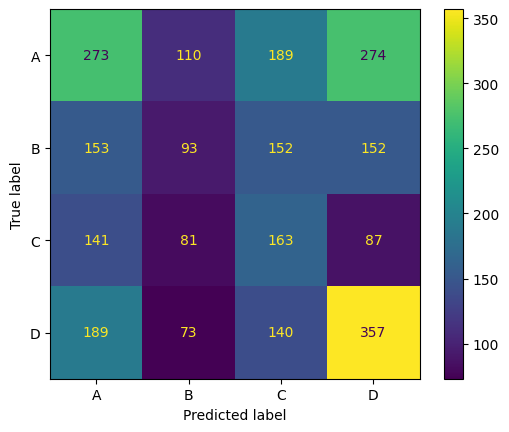

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(clf, X_test2, y_test2)

# Hide

## v2 (with interaction building)

In [ ]:
import pandas as pd
from itertools import combinations

def create_interaction(df):
  df_int = df.copy()

  # List of columns
  columns = ['Ever_Married', 'Graduated', 'Profession', 'Spending_Score']

  # Generate all pairs of columns
  pairs = list(combinations(columns, 2))

  # Create new columns with concatenated values
  for col1, col2 in pairs:
      new_col_name = f"{col1}_{col2}"
      df_int[new_col_name] = df_int[col1] + '_' + df_int[col2]

  return df_int

In [ ]:
from typing import Optional
import pandas as pd

# impute using mean and median
def data_processing_v2(data1: pd.DataFrame, data2: Optional[pd.DataFrame] = None, create_int = False):
  df1 = data1.copy()

  columns_to_drop = ["ID", "Var_1", 'Gender', 'Work_Experience']
  df1 = df1.drop(columns_to_drop, axis=1, errors="ignore")

  num_cols = df1.select_dtypes(include=np.number).columns
  cat_cols = df1.select_dtypes(include="object").columns
  imputer_list = []
  col_order_list = []

  for col in df1.columns:
    # column list order marking
    col_order_list.append(col)
    # impute median for numeric
    if col in num_cols:
      median = df1[col].median()
      imputer_list.append(median)
      df1[col] = df1[col].fillna(value=median)
    # impute mode for category
    elif col in cat_cols:
      mode = df1[col].mode()
      imputer_list.append(mode)
      df1[col] = df1[col].fillna(value=mode)

  df1_int = create_interaction(df1.iloc[:, :-1])

  # Exclude the last column
  df1_dummy = pd.get_dummies(df1_int, drop_first=True).map(lambda x: float(x))

  # Add back the "Segmentation" column
  df1_dummy["Segmentation"] = df1["Segmentation"]

  if data2 is not None:
    df2 = data2.copy()
    df2 = df2.drop(columns_to_drop, axis=1, errors="ignore")

    for idx, col in enumerate(df2.columns):
      # check if column in same order
      if col != col_order_list[idx]:
        raise Exception("Column NOT in the same order.")
      # impute value according to order
      df2[col] = df2[col].fillna(value=imputer_list[idx])

    df2_int = create_interaction(df2)

    # Exclude the last column
    df2_dummy = pd.get_dummies(df2.int, drop_first=True).map(lambda x: float(x))

    # Add back the "Segmentation" column
    df2_dummy["Segmentation"] = df2["Segmentation"]

    return df1_dummy, df2_dummy

  return df1_dummy, None

In [ ]:
df2, __ = data_processing_v2(df)

In [ ]:
df2.columns
# ref level: married=no, graduated=no, profession=arts, spend=avearge

Index(['Age', 'Family_Size', 'Ever_Married_Yes', 'Graduated_Yes',
       'Profession_Business', 'Profession_Hospital', 'Profession_Law',
       'Profession_Others', 'Spending_Score_High', 'Spending_Score_Low',
       'Ever_Married_Graduated_No_Yes', 'Ever_Married_Graduated_Yes_No',
       'Ever_Married_Graduated_Yes_Yes', 'Ever_Married_Profession_No_Business',
       'Ever_Married_Profession_No_Hospital', 'Ever_Married_Profession_No_Law',
       'Ever_Married_Profession_No_Others', 'Ever_Married_Profession_Yes_Arts',
       'Ever_Married_Profession_Yes_Business',
       'Ever_Married_Profession_Yes_Hospital',
       'Ever_Married_Profession_Yes_Law', 'Ever_Married_Profession_Yes_Others',
       'Ever_Married_Spending_Score_Yes_Average',
       'Ever_Married_Spending_Score_Yes_High',
       'Ever_Married_Spending_Score_Yes_Low',
       'Graduated_Profession_No_Business', 'Graduated_Profession_No_Hospital',
       'Graduated_Profession_No_Law', 'Graduated_Profession_No_Others',
       'G

In [ ]:
df2 = df2.drop(['Ever_Married_Graduated_No_Yes', 'Ever_Married_Profession_No_Business',
          'Ever_Married_Profession_No_Hospital', 'Ever_Married_Profession_No_Law', 'Ever_Married_Profession_No_Others', # drop married=no
          'Ever_Married_Graduated_Yes_No', 'Graduated_Profession_No_Business', 'Graduated_Profession_No_Hospital',
          'Graduated_Profession_No_Law', 'Graduated_Profession_No_Others', 'Graduated_Spending_Score_No_High', 'Graduated_Spending_Score_No_Low', # drop graduated=no
          'Ever_Married_Profession_Yes_Arts', 'Graduated_Profession_Yes_Arts', 'Profession_Spending_Score_Arts_High', 'Profession_Spending_Score_Arts_Low',# drop profession=arts
          'Ever_Married_Spending_Score_Yes_Average', 'Graduated_Spending_Score_Yes_Average', 'Profession_Spending_Score_Business_Average', 'Profession_Spending_Score_Hospital_Average',
          'Profession_Spending_Score_Law_Average', 'Profession_Spending_Score_Others_Average'], # drop spend=average
         axis=1, errors='ignore')

In [ ]:
df2.columns

Index(['Age', 'Family_Size', 'Ever_Married_Yes', 'Graduated_Yes',
       'Profession_Business', 'Profession_Hospital', 'Profession_Law',
       'Profession_Others', 'Spending_Score_High', 'Spending_Score_Low',
       'Ever_Married_Graduated_Yes_Yes',
       'Ever_Married_Profession_Yes_Business',
       'Ever_Married_Profession_Yes_Hospital',
       'Ever_Married_Profession_Yes_Law', 'Ever_Married_Profession_Yes_Others',
       'Ever_Married_Spending_Score_Yes_High',
       'Ever_Married_Spending_Score_Yes_Low',
       'Graduated_Profession_Yes_Business',
       'Graduated_Profession_Yes_Hospital', 'Graduated_Profession_Yes_Law',
       'Graduated_Profession_Yes_Others', 'Graduated_Spending_Score_Yes_High',
       'Graduated_Spending_Score_Yes_Low',
       'Profession_Spending_Score_Business_High',
       'Profession_Spending_Score_Business_Low',
       'Profession_Spending_Score_Hospital_High',
       'Profession_Spending_Score_Hospital_Low',
       'Profession_Spending_Score_Law_High

In [ ]:
df2.head()

,Age,Family_Size,Ever_Married_Yes,Graduated_Yes,Profession_Business,Profession_Hospital,Profession_Law,Profession_Others,Spending_Score_High,Spending_Score_Low,...,Graduated_Spending_Score_Yes_Low,Profession_Spending_Score_Business_High,Profession_Spending_Score_Business_Low,Profession_Spending_Score_Hospital_High,Profession_Spending_Score_Hospital_Low,Profession_Spending_Score_Law_High,Profession_Spending_Score_Law_Low,Profession_Spending_Score_Others_High,Profession_Spending_Score_Others_Low,Segmentation
0,22.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,D
1,38.0,3.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A
2,67.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,B
3,67.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,B
4,40.0,6.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A


# Feature Selection

In [ ]:
X = df2.iloc[:, :-1]
y = df2.iloc[:, -1]

print(X.columns)
print(y)

Index(['Age', 'Family_Size', 'Ever_Married_Yes', 'Graduated_Yes',
       'Profession_Business', 'Profession_Hospital', 'Profession_Law',
       'Profession_Others', 'Spending_Score_High', 'Spending_Score_Low',
       'Ever_Married_Graduated_Yes_Yes',
       'Ever_Married_Profession_Yes_Business',
       'Ever_Married_Profession_Yes_Hospital',
       'Ever_Married_Profession_Yes_Law', 'Ever_Married_Profession_Yes_Others',
       'Ever_Married_Spending_Score_Yes_High',
       'Ever_Married_Spending_Score_Yes_Low',
       'Graduated_Profession_Yes_Business',
       'Graduated_Profession_Yes_Hospital', 'Graduated_Profession_Yes_Law',
       'Graduated_Profession_Yes_Others', 'Graduated_Spending_Score_Yes_High',
       'Graduated_Spending_Score_Yes_Low',
       'Profession_Spending_Score_Business_High',
       'Profession_Spending_Score_Business_Low',
       'Profession_Spending_Score_Hospital_High',
       'Profession_Spending_Score_Hospital_Low',
       'Profession_Spending_Score_Law_High

In [ ]:
from sklearn.dummy import DummyClassifier

dummy_model = DummyClassifier(strategy="stratified")
dummy_model.fit(X, y)
dummy_acc = dummy_model.score(X, y)
dummy_roc_auc = roc_auc_score(y, dummy_model.predict_proba(X), multi_class='ovr')

print(f"Baseline Accuracy (Stratified): {dummy_acc:.6f}")
print(f"Baseline AUC score (Stratified): {dummy_acc:.6f}")

dummy_model = DummyClassifier(strategy="most_frequent")
dummy_model.fit(X, y)
dummy_acc = dummy_model.score(X, y)
dummy_roc_auc = roc_auc_score(y, dummy_model.predict_proba(X), multi_class='ovr')

print(f"Baseline Accuracy (Frequent): {dummy_acc:.6f}")
print(f"Baseline AUC score (Frequent): {dummy_acc:.6f}")

Baseline Accuracy (Stratified): 0.250372
Baseline AUC score (Stratified): 0.250372
Baseline Accuracy (Frequent): 0.281111
Baseline AUC score (Frequent): 0.281111


In [ ]:
mu_age = X['Age'].mean()
sd_age = X['Age'].std()

X['Age'] = X['Age'].apply(lambda age: (age-mu_age)/sd_age)
X['Age']

,Age
0,-1.284544
1,-0.327131
2,1.408181
3,1.408181
4,-0.207454
...,...
8063,-1.284544
8064,-0.506646
8065,-0.626322
8066,-0.985352


('Age', 'Ever_Married_Graduated_Yes_Yes', 'Spending_Score_Low', 'Profession_Spending_Score_Hospital_Low', 'Ever_Married_Yes', 'Graduated_Yes', 'Profession_Hospital', 'Family_Size', 'Ever_Married_Spending_Score_Yes_High', 'Graduated_Spending_Score_Yes_High', 'Spending_Score_High', 'Profession_Spending_Score_Business_High', 'Graduated_Spending_Score_Yes_Low', 'Graduated_Profession_Yes_Business', 'Profession_Spending_Score_Business_Low', 'Graduated_Profession_Yes_Hospital', 'Ever_Married_Profession_Yes_Law', 'Profession_Law', 'Profession_Others', 'Ever_Married_Profession_Yes_Others', 'Graduated_Profession_Yes_Others', 'Graduated_Profession_Yes_Law', 'Profession_Spending_Score_Others_Low', 'Profession_Spending_Score_Others_High', 'Profession_Spending_Score_Law_Low', 'Profession_Spending_Score_Law_High', 'Profession_Spending_Score_Hospital_High', 'Profession_Business', 'Ever_Married_Spending_Score_Yes_Low', 'Ever_Married_Profession_Yes_Hospital', 'Ever_Married_Profession_Yes_Business')
(0.1

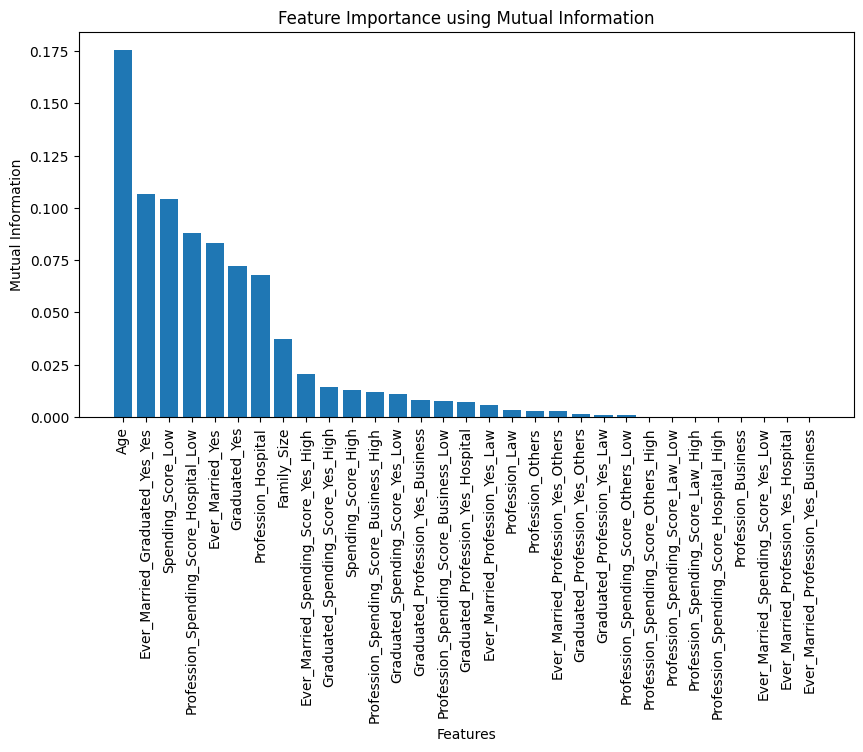

In [ ]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
import numpy as np

# Compute mutual information
mic = mutual_info_classif(X, y)

# Sort mic and X.columns based on mic values in descending order
sorted_mic, sorted_columns = zip(*sorted(zip(mic, X.columns), reverse=True))

print(sorted_columns)  # Sorted feature names
print(sorted_mic)      # Sorted mutual information values

# Plot feature importance
plt.figure(figsize=(10, 5))
plt.bar(sorted_columns, sorted_mic)
plt.xticks(rotation=90)  # Rotate x-axis labels if there are many features
plt.xlabel("Features")
plt.ylabel("Mutual Information")
plt.title("Feature Importance using Mutual Information")
plt.show()

In [ ]:
X.columns

Index(['Age', 'Family_Size', 'Ever_Married_Yes', 'Graduated_Yes',
       'Profession_Business', 'Profession_Hospital', 'Profession_Law',
       'Profession_Others', 'Spending_Score_High', 'Spending_Score_Low',
       'Ever_Married_Graduated_Yes_Yes',
       'Ever_Married_Profession_Yes_Business',
       'Ever_Married_Profession_Yes_Hospital',
       'Ever_Married_Profession_Yes_Law', 'Ever_Married_Profession_Yes_Others',
       'Ever_Married_Spending_Score_Yes_High',
       'Ever_Married_Spending_Score_Yes_Low',
       'Graduated_Profession_Yes_Business',
       'Graduated_Profession_Yes_Hospital', 'Graduated_Profession_Yes_Law',
       'Graduated_Profession_Yes_Others', 'Graduated_Spending_Score_Yes_High',
       'Graduated_Spending_Score_Yes_Low',
       'Profession_Spending_Score_Business_High',
       'Profession_Spending_Score_Business_Low',
       'Profession_Spending_Score_Hospital_High',
       'Profession_Spending_Score_Hospital_Low',
       'Profession_Spending_Score_Law_High

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.multiclass import OneVsRestClassifier
from scipy.stats import uniform

# Define the base model
model = OneVsRestClassifier(LogisticRegression(tol=1e-3, max_iter=200))

# Define the hyperparameter distribution (for LogisticRegression inside OneVsRestClassifier)
distributions = {"estimator__C": uniform(loc=0, scale=5)}

# Perform Randomized Search
clf = RandomizedSearchCV(model, distributions, n_iter=20, scoring='roc_auc_ovr', random_state=42)
search = clf.fit(X, y)

# Print the best parameters and score
print(search.best_params_)
print(search.best_score_)

{'estimator__C': 0.7800932022121826}
0.7478643675843465


In [ ]:
print(search.best_params_)
print(search.best_score_)

{'C': 2.8340067511487517}
0.5055766691173251


# Hide

In [ ]:
import numpy as np

# Example usage
np.random.seed(42)

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin
from xgboost import XGBClassifier

class XGBClassifierWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, **params):
        self.model = XGBClassifier(**params)

    def fit(self, X, y):
        self.model.fit(X, y)
        return self

    def predict(self, X):
        return self.model.predict(X)

    def predict_proba(self, X):
        return self.model.predict_proba(X)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier

def k_fold_cross_validation_v2(X, y, model, k=5, random_state=42):
    """
    Perform k-fold cross-validation with imputation and encoding for numerical and categorical variables.

    Parameters:
        X (pd.DataFrame): Feature dataframe.
        y (pd.Series): Target variable.
        model: Model to train and validate.
        k (int): Number of folds.
        random_state (int): Random seed for reproducibility.

    Returns:
        dict: Results including accuracy per fold and mean accuracy.
    """
    # Encode target labels to numeric values (if categorical)
    if y.dtype == 'object':
        label_encoder = LabelEncoder()
        y = label_encoder.fit_transform(y)
        y = pd.Series(y)  # Convert back to pandas Series

    # Initialize k-fold cross-validation
    skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=random_state)
    fold_accuracies = []
    fold_auc_scores = []

    #if isinstance(model, XGBClassifierWrapper):
     # class_dict = {
      #    "A": 0,
       #   "B": 1,
        #  "C": 2,
         # "D": 3
      #}
      #y = y.replace(class_dict)"""

    # Cross-validation loop
    for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
        print(f"Fold {fold + 1}")

        # Split data into training and validation sets
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        # Train the pipeline
        model.fit(X_train, y_train)
        print(model.coef_)

        # Validate the pipeline
        y_pred = model.predict(X_val)
        if isinstance(model, SVC):
          pass
        else:
          y_pred_prob = model.predict_proba(X_val)
          print(y_pred_prob[0, :])

        accuracy = accuracy_score(y_val, y_pred)
        fold_accuracies.append(accuracy)

        if isinstance(model, SVC):
          roc_auc = 0
          fold_auc_scores.append(roc_auc)
        else:
          roc_auc = roc_auc_score(y_val, y_pred_prob, multi_class="ovr", average="weighted")
          fold_auc_scores.append(roc_auc)

        print(f"Fold {fold + 1} Accuracy: {accuracy:.6f} Roc-Auc: {roc_auc:.6f}")

    # Final results
    mean_accuracy = np.mean(fold_accuracies)
    print(f"\nMean Accuracy: {mean_accuracy:.6f}")
    print(f"Accuracy per fold: {fold_accuracies}")

    mean_auc = np.mean(fold_auc_scores)
    print(f"\nMean Roc-Auc: {mean_auc:.6f}")
    print(f"Roc-Auc per fold: {fold_auc_scores}")

In [ ]:
from sklearn.linear_model import LogisticRegression

# Model
model = LogisticRegression(tol=1e-6, max_iter=1000)

# Perform k-fold cross-validation
results = k_fold_cross_validation_v2(
    X, y, model, k=5
)

Fold 1
[[-6.92369458e-02 -9.65867955e-02 -4.38442728e-02  5.18175826e-01
   4.90288008e-01 -8.02028207e-01  5.11974764e-01  5.52171882e-01
  -3.05822588e-02  2.18246600e-01 -6.84940856e-01  1.13703372e-02
   8.95143372e-01 -2.26459875e-01 -4.27847053e-02  2.30756704e-01
   6.00163986e-01 -2.22442357e-01  1.69701205e-01  2.62814166e-01
  -3.69323651e-01 -2.53397631e-01 -2.91476154e-01 -3.72455689e-01
  -7.67814427e-01 -3.32941070e-01 -8.63704975e-02  7.42929664e-02
  -5.70497486e-01  4.77508713e-01 -9.64927527e-02]
 [ 2.59957692e-01  4.25954968e-03  1.54492392e-01  4.69385033e-01
   1.20809951e-03 -2.25259172e-02 -1.89107225e-01 -4.33251106e-01
  -3.83773493e-01 -4.85191841e-01 -1.34216093e-01 -7.94975746e-02
  -1.82628010e-01 -7.39629611e-02  5.00722391e-01  1.98091559e-01
   8.79297574e-02 -9.99066984e-02 -3.46509563e-01 -1.52158366e-02
  -1.86329382e-03 -7.04962330e-02  2.95247070e-02  9.52656890e-02
  -3.06318294e-01  4.27768113e-01 -1.44850117e-01 -8.25283051e-02
  -6.46878216e-01 

In [ ]:
from lightgbm import LGBMClassifier

params = {
    'objective': 'multiclass',  # for multiclass classification
    'metric': 'multi_error',  # for accuracy
    'boosting_type': 'gbdt',  # Gradient Boosting Decision Tree
    'learning_rate': 0.05,  # learning rate
}

# Model
model = LGBMClassifier(**params)

# Perform k-fold cross-validation
results = k_fold_cross_validation_v2(
    X, y, model, k=5
)

Fold 1
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005615 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 148
[LightGBM] [Info] Number of data points in the train set: 6454, number of used features: 37
[LightGBM] [Info] Start training from score -1.408542
[LightGBM] [Info] Start training from score -1.468612
[LightGBM] [Info] Start training from score -1.409810
[LightGBM] [Info] Start training from score -1.269166
Fold 1 Accuracy: 0.503717 Roc-Auc: 0.768638
Fold 2
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001447 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 148
[LightGBM] [Info] Number of data points in the train set: 6454, number of used features: 37
[LightGBM] [Info] Start 